In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.express as px
import seaborn as sns
import plotly.subplots
#from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

In [6]:
# DATA PREPARATION FOR URC - Ukraine Red Cross

# STEP 1: Group teams into centers and sectors
# Load the dataframe from "ungrouped_ALL_with_Regions.txt"
file_path = "ungrouped_ALL_with_regions.txt"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

df.info()

# Filter the dataframe for 'country' = 'Lebanon'
df = df[df['Country'] == 'Ukraine']
df.info()

#drop teams that are not relevant (small teams, tests) - see email Salam Salloum 8 Sept 23.
#df['Team'] = df['Team Name']
#df = df.drop(df[df.Team == 'SRK-Fachtagung'].index)
#df = df.drop(df[df.Team == 'IT GS SRK'].index)

# change the names of teams that have been re-named in Moti
# see email Salam Salloum 8 Sept 23.
#changednames_dict = {
#'BcharriYouth2023': "LRCY.23 - Bchare",
#    }

#df['Team']=df['Team'].replace(to_replace=changednames_dict)

# Create a dictionary of team names and corresponding Regions to Allocate teams to circles
# in this case "Regions". Some teams are their own circle - see workspace on Motiro

team_region_dict = {
'VYDU':  'URCS HQ',
'OD Department':  'URCS HQ',
'OD Department Heads':  'URCS HQ',
'InterRegional Specialists':  'URCS HQ',
'Rehab&support dept':  'URCS HQ',
'Regional Specialists':  'Regional Specialists',
'Індустріальна РО':  'Kharkiv Region',
'Гуманітарна допомога ХОО ТЧХУ':  'Kharkiv Region',
'ПЗ ПСП ХОО ТЧХУ':  'Kharkiv Region',
'Перша допомога ХОО ТЧХУ':  'Kharkiv Region',
'Адміністративна діяльність ХОО ТЧХУ':  'Kharkiv Region',
'Керівництво ХОО ТЧХУ':  'Kharkiv Region',
'Реліф ХОО ТЧХУ':  'Kharkiv Region',
'Догляд Вдома ХОО ТЧХУ':  'Kharkiv Region',
'ММБ ХОО ТЧХУ':  'Kharkiv Region',
'Кол-центр ХОО ТЧХУ':  'Kharkiv Region',
'Загін швидкого реагування ХОО ТЧХУ':  'Kharkiv Region',
'Мінна небезпека ХОО ТЧХУ':  'Kharkiv Region',
'Мобілізація ресурсів ХОО ТЧХУ':  'Kharkiv Region',
'Ізюмська МРО':  'Kharkiv Region',
'Богодухівська РО':  'Kharkiv Region',
'Зміївська':  'Kharkiv Region',
'Красноградська РО':  'Kharkiv Region',
'Холодногірська РО':  'Kharkiv Region',
'Шевченківська РО':  'Kharkiv Region',
'Київська РО':  'Kharkiv Region',
'Слобідьська РО':  'Kharkiv Region',
'Салтівська РО':  'Kharkiv Region',
'Куп\'янська МРО':  'Kharkiv Region',
'Лозівська':  'Kharkiv Region',
'Служба розшуку ХОО ТЧХУ':  'Kharkiv Region',
'Пропаганда донорства крові та її компонентів':  'Kharkiv Region',
'Інформаційна діяльність ХОО':  'Kharkiv Region',
'Sumy_City_Volunteers':  'Sumy Region',
'Romny_City_Volunteers':  'Sumy Region',
'Konotop_City_Volunteers':  'Sumy Region',
'Ohtyrka_City_Volunteers':  'Sumy Region',
'Shostka_City_Volunteers':  'Sumy Region',
'Sumy_Regional_ERT':  'Sumy Region',
'Sumy_Regional_PSS_JointStaffVolunteers':  'Sumy Region',
'Sumy_Regional_Home-BasedCare':  'Sumy Region',
'Sumy_Regional_MineRiskAwareness':  'Sumy Region',
'Sumy_Regional_FirstAid':  'Sumy Region',
'Sumy_Regional_Staff':  'Sumy Region',
'Nizhyn_District_Volunteers':  'Chernihiv Region',
'Pryluky_District_Volunteers':  'Chernihiv Region',
'Chernihiv_City_Volunteers':  'Chernihiv Region',
'Korop_District_Volunteers':  'Chernihiv Region',
'Koryukivka_District_Volunteers':  'Chernihiv Region',
'Chernihiv_ Regional_Staff':  'Chernihiv Region',
'Kyiv_Regional_Volunteers':  'Kyiv Region',
'Kyiv-Svyastoshynska_District_Volunteers':  'Kyiv Region',
'Obukhiv_District_Volunteers':  'Kyiv Region',
'Boryspil_District_Voluunteers':  'Kyiv Region',
'Brovary_District_Volunteers':  'Kyiv Region',
'Bucha_Filia_Kyiv_Regional_Volunteers':  'Kyiv Region',
'Vyshhorod District Volunteers':  'Kyiv Region',
'Bila Tserkva District Volunteers':  'Kyiv Region',
'Bucha_Filia_Kyiv_Regional_Volunteers 1':  'Kyiv Region',
'Kyiv_City_Staff':  'Kyiv city',
'Kyiv_City_Volunteers':  'Kyiv city',
'Kyiv_Holosiivskyi District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Darnytskyi District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Desnyanskyi District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Dniprovsky District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Obolonsky District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Pechersky District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Podolsky District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Svyatoshinsky District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Solomianskyi District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Shevchenkivskyi District_JointStaffVolunteers':  'Kyiv city',
'Cherkasy_Regional_Staff':  'Cherkasy Region',
'Cherkasy_RegionalCity_JointStaff':  'Cherkasy Region',
'Cherkasy_City_Volunteers':  'Cherkasy Region',
'Zolotonosha_District_Volunteers':  'Cherkasy Region',
'Zvenyhorodka_District_Volunteers':  'Cherkasy Region',
'Uman_District_Volunteers':  'Cherkasy Region',
'Cherkasy_Regional_Volunteers':  'Cherkasy Region',
'Kalush district joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Kalush district  joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Nadvirna district joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Ivano-Frankivsk city joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Ivano-Frankivsk city  joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Verkhovyna district joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Kosiv district joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Kolomyya district joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Ivano-Frankivsk Regional Staff':  'Ivano-Frankivsk Region',
'Ivano- Frankivsk Regional| home based care':  'Ivano-Frankivsk Region',
'Ivano-Frankivsk Regional PSS':  'Ivano-Frankivsk Region',
'Ivano-Frankivsk Regional ERT joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Vinnytsia_District_JointStaffVolunteers': 'Vinnitsa Region',
'LadyzhynHaisyn_District_JointStaffVolunteers': 'Vinnitsa Region',
'Zhmerynka_District_JointStaffVolunteers': 'Vinnitsa Region',
'Mohyliv-PodilskyiYampil_District_JointStaffVolunteers': 'Vinnitsa Region',
'Tulchyn_District_JointStaffVolunteers': 'Vinnitsa Region',
'Khmilnyk_District_JointStaffVolunteers': 'Vinnitsa Region',
'Vinnytsia_Regional_Staff': 'Vinnitsa Region',
'Vinnytsia_Regional_PSS_Volunteers': 'Vinnitsa Region',
'Vinnytsia_Regional_FirstAidERT_Volunteers': 'Vinnitsa Region',
'Chernivtsi_Regional_Staff': 'Chernivtsi Region',
'Novoselytska_City_VolunteersStaff': 'Chernivtsi Region',
'Vyzhnytska_District_VolunteersStaff': 'Chernivtsi Region',
'Chernivetska_District_JointStaffVolunteers': 'Chernivtsi Region',
'Dnistrovska_District_JoinStaffVolunteers': 'Chernivtsi Region',
'Chernivtsi_Regional_PSS': 'Chernivtsi Region',
'Chernivtsi_Regional_ERT': 'Chernivtsi Region',
'Kamianets_Podilskyi_District_JointStaffVolunteers': 'Khmelnytskyi Region', 
'Slavuta_City_JointStaffVolunteers': 'Khmelnytskyi Region', 
'Khmelnytskyi_District_JointStaffVolunteers': 'Khmelnytskyi Region',
'Starokostiantyniv_City_JointStaffVolunteers': 'Khmelnytskyi Region',
'Kamianets_Podilskyi_City_JointStaffVolunteers': 'Khmelnytskyi Region',
'Shepetivka_District_JointStaffVolunteers': 'Khmelnytskyi Region',
'Khmelnytskyi_Regional_Staff': 'Khmelnytskyi Region',
'Zhytomyr_Regional_Staff': 'Zytomyr Region',
'Berdychiv_City_JointStaffVolunteers': 'Zytomyr Region',
'Zhytomyr_City_JointStaffVolunteers': 'Zytomyr Region',
'Korosten_City_JointStaffVolunteers': 'Zytomyr Region',
'Novohrad-Volunskyy_District_JointStaffVolunteers': 'Zytomyr Region',
'Radomyshl_District_JointStaffVolunteers': 'Zytomyr Region',
'Ruzhyn_District_JointStaffVolunteers': 'Zytomyr Region',
'Borshchiv_District_JoinStaffVolunteers': 'Ternopil Region',
'Zbarazh_District_JoinStaffVolunteers': 'Ternopil Region',
'Kremenets_District_JoinStaffVolonteers': 'Ternopil Region',
'Lanivtsi_District_JoinStaffVolonteers': 'Ternopil Region',
'Pidvolochysk_District_JoinStaffVolonteers': 'Ternopil Region',
'Ternopil_City_JoinStaffVolonteers': 'Ternopil Region',
'Ternopil_Disctict_JoinStaffVolonteers': 'Ternopil Region',
'Chortkiv_District_JoinStaffVolunteers': 'Ternopil Region',
'Ternopil_Regional_ERTFirstAid_Volonteers': 'Ternopil Region',
'Ternopil_Regional_JoinStaff': 'Ternopil Region',
'Khust_District_Volonteers': 'Zakarpattya Region',
'Rahiv_District_Volonteers': 'Zakarpattya Region',
'Uzhhorod_City_Volonteers': 'Zakarpattya Region',
'Mukachevo_City_Volonteers': 'Zakarpattya Region',
'Mukachevo_District_Volonteers': 'Zakarpattya Region',
'Irshava_District_Volonteers': 'Zakarpattya Region',
'Berehovo_District_Volonteers': 'Zakarpattya Region',
'Tyachiv_District_Volonteers': 'Zakarpattya Region',
'Zakarpattia_Regional_Staff': 'Zakarpattya Region',
'Dobropillya_District_Joint_Staff_Volunteers': 'Donetsk Region',
'Pokrovsk_District_Joint_Staff_Volunteers': 'Donetsk Region',
'Kostyantynivka_District_Joint_Staff_Volunteers': 'Donetsk Region',
'Mirnohrad_City_Joint_Staff_Volunteers': 'Donetsk Region',
'Kurakhovo_District_Joint_Staff_Volunteers': 'Donetsk Region',
'Kramatorsk_City_Joint_Staff_Volunteers': 'Donetsk Region',
'Slovyansk_District_Joint_Staff_Volunteers': 'Donetsk Region',
'Druzhkivka_City_Joint_Staff_Volunteers': 'Donetsk Region',
'Liman_District_Joint_Staff_Volunteers': 'Donetsk Region',
'Donetsk_Regional_Staff': 'Donetsk Region',
'Dnipro_Regional_ERT_Volunteers': 'Dnipro Region',
'Dnipro_Regional_Staff': 'Dnipro Region',
'Kryvyi Rih_District_ERT_Volunteers': 'Dnipro Region',
'Nikopol_District_ERT_Volunteers': 'Dnipro Region',
'Dniprovska_ City_Volunteers': 'Zaporizhya Region',
'Local_ City_Volunteers': 'Zaporizhya Region',
'Komunarska_ City_Volunteers': 'Zaporizhya Region',
'Pologyvska _ Regional_Volunteers': 'Zaporizhya Region',
'Zavodsky _ City_Volunteers': 'Zaporizhya Region',
'Voznesenovsky_City_Volunteers': 'Zaporizhya Region',
'Volnyansk_ Regional_Volunteers': 'Zaporizhya Region',
'Запорізька района філія ЗОО ТЧХУ': 'Zaporizhya Region',
'Kushugum_Region_Volunteers': 'Zaporizhya Region',
'Odesa_ Regional_Staff': 'Odessa Region',
'Prymorska_City_Volunteers': 'Odessa Region',
'Malinоvska_City_Volunteers': 'Odessa Region',
'Chornomorska_District_Volunteers': 'Odessa Region',
'Suvorоvska_City_Volunteers': 'Odessa Region',
'Kyivska_City_Volunteers': 'Odessa Region',
'Podilska_District_Volunteers': 'Odessa Region',
'Bilhorod-Dnistrovska_District_Volunteers': 'Odessa Region',
'Rozdilnianska_District_Volunteers': 'Odessa Region',
'Bolgradska_District_Volunteers': 'Odessa Region',
'Izmail_District_Volunteers': 'Odessa Region',
'Ochakiv_City_Volunteers': 'Mykolaiv Region',
'Ochakiv_City_Staff': 'Mykolaiv Region',
'Yuzhnoukrainsk_City_Volunteers': 'Mykolaiv Region',
'Yuzhnoukrainsk_City_Staff': 'Mykolaiv Region',
'Snihurivka_City_JointStaffVolunteers': 'Mykolaiv Region',
'Mykolaiv_District_SocialSupport_Staff': 'Mykolaiv Region',
'Pervomaisk_District_Staff': 'Mykolaiv Region',
'Pervomaisk_District_Volunteers': 'Mykolaiv Region',
'Mykolaiv_District_SaveTheChildren_Staff': 'Mykolaiv Region',
'Mykolaiv_District_SCICaseManagers_Staff': 'Mykolaiv Region',
'Bashtanka_Distctrict_Staff': 'Mykolaiv Region',
'Bashtanka_District_Volunteers': 'Mykolaiv Region',
'Mykolaiv_District_Volunteers': 'Mykolaiv Region',
'Mykolaiv_District_PSS_Staff': 'Mykolaiv Region',
'Mykolaiv_District_Staff': 'Mykolaiv Region',
'Voznesensk_District_Volunteers\Staff': 'Mykolaiv Region',
'Kirovohrad_ Regional_Staff': 'Kropyvnytskyi Region',
'Kirovohrad_ Regional__Home-BasedCare_Volunteers': 'Kropyvnytskyi Region',
'Kropyvnytskyi_ District_Volunteers': 'Kropyvnytskyi Region',
'Blagovishchenskа_District_Volunteers': 'Kropyvnytskyi Region',
'Onufrievska_District_Volunteers': 'Kropyvnytskyi Region',
'Novomyrhorod_District_Volunteers': 'Kropyvnytskyi Region',
'Kirovohrad_ PSS_Volunteers': 'Kropyvnytskyi Region',
'Kirovohrad_ Regional_Volunteers': 'Kropyvnytskyi Region',
'Oleksandriiska_District_Volunteers': 'Kropyvnytskyi Region',
'Novovorontsovska_District_JointStaffVolunteers': 'Kherson Region',
'Dniprovska_District_JointStaffVolunteers': 'Kherson Region',
'Bilozerska_District_JointStaffVolunteers': 'Kherson Region',
'Korabelna_District_JointStaffVolunteers': 'Kherson Region',
'Kherson_ Regional_JointStaffVolunteers': 'Kherson Region',
'Stryi District Staff Volunteers': 'Lviv Region',
'Yavoriv District Staff Volunteers': 'Lviv Region',
'Chervonograd District Staff Volunteers': 'Lviv Region',
'Stryi District Representation Staff Volunteers': 'Lviv Region',
'Sambir District Staff Volunteers': 'Lviv Region',
'Lychakivska & Syhiv City Representation Staff Volunteers': 'Lviv Region',
'Zolochiv District Staff Volunteers': 'Lviv Region',
'Drogobych District Staff Volunteers': 'Lviv Region',
'Lviv Regional Staff': 'Lviv Region',
'Lviv City Staff Volunteers': 'Lviv Region',
'Lviv District Staff Volunteers': 'Lviv Region',
'Mykolaiv District Staff Volunteers': 'Lviv Region',
'Zolochiv Representation District Staff Volunteers': 'Lviv Region',
'Novoyavorivsk & Zhovkva District Staff Volunteers': 'Lviv Region',
'Novoyavorivsk & Zhovkva  District Staff Volunteers': 'Lviv Region',
'Franskivska City Representation Staff Volunteers': 'Lviv Region',
'Rivne_Regional_Staff': 'Rivne Region',
'Varash_City_Volunteers': 'Rivne Region',
'Dubno_City_Volunteers': 'Rivne Region',
'Zdolbuniv_City_Volunteers': 'Rivne Region',
'Koretc_City_Volunteers': 'Rivne Region',
'Rivne_City_Volunteers': 'Rivne Region',
'Sarny_City_Volunteers': 'Rivne Region',
'Rivne_Regional_BraVo_Staff': 'Rivne Region',
'Rozhyshche_District_Volunteers': 'Volyn Region',
'Kovel_District_Volunteers': 'Volyn Region',
'Novovolynsk_City_Volunteers': 'Volyn Region',
'Volodymyr-Volynskyi_District_Volunteers': 'Volyn Region',
'Lutsk_City_Volunteers': 'Volyn Region',
'Lutsk_District_Volunteers': 'Volyn Region',
'Kamin`-Kashyrskyi_District_Volunteers': 'Volyn Region',
'Psychosocial Support або PSS': 'Poltava Region',
'Resource Mobilisation': 'Poltava Region',
'Humanitarian Aid': 'Poltava Region',
'Home-Based Care': 'Poltava Region',
'Communications': 'Poltava Region',
'Resource Mobilisation': 'Poltava Region',
'employees': 'Poltava Region',
'Dikanyka RO': 'Poltava Region',
'Lubny Local Organization': 'Poltava Region',
'Kremenchuk Local Organization': 'Poltava Region',
'Chornukhy Local Organization': 'Poltava Region',
'Myrhorod Local Organization': 'Poltava Region',
'Poltava Regional Organization': 'Poltava Region',
'Poltava MO': 'Poltava Region',
'Franskivska & Lychakivska & Syhiv City Representation Staff Volunteers' : 'Lviv Region',
'Kropyvnytskyi_ District_Volunteers': 'Kropyvnytskyi Region',
'Kropyvnytskyi_District_Volunteers': 'Kropyvnytskyi Region',
'Sarny_City_United_Headquarters_of_Volunteers': 'Rivne Region',
'Вижницька РО': 'Chernivtsi Region',
'Interregional_Specialists': 'URCS HQ',
}

# Create an empty 'region' column
## NB region with small caps to differentiate with Region = IFRC Regions
df['region'] = ''

# Iterate over unique 'Team Name' values and prompt user for Center input
for team_name in df['Team Name'].unique():
    # Check if the team name is in the dictionary
    if team_name in team_region_dict:
        region = team_region_dict[team_name]
    else:
        # If the team name is not in the dictionary, prompt for user input
        region = input(f"Enter the URC region for Team Name '{team_name}': ")
    
    df.loc[df['Team Name'] == team_name, 'region'] = region

# Create a dictionary of frontline - not frontline teams / regions
team_frontline_dict = {
'Dobropillya_District_Joint_Staff_Volunteers': 'Frontline',
'Pokrovsk_District_Joint_Staff_Volunteers': 'Frontline',
'Kostyantynivka_District_Joint_Staff_Volunteers': 'Frontline',
'Mirnohrad_City_Joint_Staff_Volunteers': 'Frontline',
'Kurakhovo_District_Joint_Staff_Volunteers': 'Frontline',
'Kramatorsk_City_Joint_Staff_Volunteers': 'Frontline',
'Slovyansk_District_Joint_Staff_Volunteers': 'Frontline',
'Druzhkivka_City_Joint_Staff_Volunteers': 'Frontline',
'Liman_District_Joint_Staff_Volunteers': 'Frontline',
'Donetsk_Regional_Staff': 'Frontline',
'Dniprovska_ City_Volunteers': 'Frontline',
'Local_ City_Volunteers': 'Frontline',
'Komunarska_ City_Volunteers': 'Frontline',
'Pologyvska _ Regional_Volunteers': 'Frontline',
'Zavodsky _ City_Volunteers': 'Frontline',
'Voznesenovsky_City_Volunteers': 'Frontline',
'Volnyansk_ Regional_Volunteers': 'Frontline',
'Запорізька района філія ЗОО ТЧХУ': 'Frontline',
'Kushugum_Region_Volunteers': 'Frontline',
'Sumy_City_Volunteers': 'Sumy Region',
'Shostka_City_Volunteers': 'Sumy Region',
'Sumy_Regional_ERT': 'Sumy Region',
'Sumy_Regional_PSS_JointStaffVolunteers': 'Frontline',
'Sumy_Regional_Home-BasedCare': 'Frontline',
'Sumy_Regional_MineRiskAwareness': 'Frontline',
'Sumy_Regional_FirstAid': 'Frontline',
'Sumy_Regional_Staff': 'Frontline',
'Kryvyi Rih_District_ERT_Volunteers': 'Frontline',
'Nikopol_District_ERT_Volunteers': 'Frontline',
'Novovorontsovska_District_JointStaffVolunteers': 'Frontline',
'Dniprovska_District_JointStaffVolunteers': 'Frontline',
'Bilozerska_District_JointStaffVolunteers': 'Frontline',
'Korabelna_District_JointStaffVolunteers': 'Frontline',
'Kherson_ Regional_JointStaffVolunteers': 'Frontline',
'Індустріальна РО': 'Frontline',
'ПЗ ПСП ХОО ТЧХУ': 'Frontline',
'Адміністративна діяльність ХОО ТЧХУ': 'Frontline',
'Реліф ХОО ТЧХУ': 'Frontline',
'Загін швидкого реагування ХОО ТЧХУ': 'Frontline',
'Ізюмська МРО': 'Frontline',
'Богодухівська РО': 'Frontline',
'Холодногірська РО': 'Frontline',
'Шевченківська РО': 'Frontline',
'Київська РО': 'Frontline',
"Куп'янська МРО": 'Frontline',
'Лозівська': 'Frontline',
'Пропаганда донорства крові та її компонентів': 'Frontline',
}

# Create the "frontline" column and set default value to 'Not frontline'
df['frontline'] = 'Not frontline'

# Update the "frontline" column based on the dictionary
df.loc[df['Team Name'].isin(team_frontline_dict.keys()), 'frontline'] = 'Frontline'

#Create dummy variable for frontline
team_frontline_dict = {
'Frontline': 1,
'Not frontline': 0
}

# Allocate dummy variable 'Front' to each "frontline" state using the dictionary
df['Front'] = df['frontline'].map(team_frontline_dict)

#Export cleaned URC data to CSV file
df.to_csv('URC_ALL.txt', index=False)

# STEP 2: Create a dataframe for Ukraine RC where one row is one team

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

team_df = df.groupby('Team Name').size().reset_index(name='size (n)')

# Exclude non-numeric columns before calculating the mean
numeric_df = df.select_dtypes(include='number')
mean_df = numeric_df.groupby(df['Team Name']).mean().reset_index()

# Merge the size (count), mean and Sector DataFrames
team_df = team_df.merge(mean_df, on='Team Name').merge(df[['Team Name', 'region', 'frontline']
                                                    ].drop_duplicates(), on='Team Name')

# For ALL (Volunteers and staff) - create files with Teams data
#team_df.to_excel('URC_team.xlsx', index=False)
team_df.to_csv('URC_team.txt', index=False)
team_df.to_csv('URC_team.csv', index=False)


<>:219: SyntaxWarning: invalid escape sequence '\S'
<>:219: SyntaxWarning: invalid escape sequence '\S'
C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_27472\4266007696.py:219: SyntaxWarning: invalid escape sequence '\S'
  'Voznesensk_District_Volunteers\Staff': 'Mykolaiv Region',


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9789 entries, 0 to 9788
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         9789 non-null   object 
 1   Well-being        9789 non-null   float64
 2   Needs             9789 non-null   float64
 3   Engagement        9789 non-null   float64
 4   Autonomy          9789 non-null   float64
 5   Belonging         9789 non-null   float64
 6   Competence        9789 non-null   float64
 7   Leadership        9789 non-null   float64
 8   Management        9789 non-null   float64
 9   Returns           9789 non-null   float64
 10  Rewards           9789 non-null   float64
 11  Status            9789 non-null   float64
 12  Myself            9789 non-null   int64  
 13  Tasks             9789 non-null   int64  
 14  Free              9789 non-null   int64  
 15  Mastery           9789 non-null   int64  
 16  Competent         9789 non-null   int64  


In [ ]:
## List of teams for data editing
print(team_df['Team Name'].unique())

['Bashtanka_Distctrict_Staff' 'Bashtanka_District_Volunteers'
 'Berdychiv_City_JointStaffVolunteers' 'Berehovo_District_Volonteers'
 'Bila Tserkva District Volunteers'
 'Bilhorod-Dnistrovska_District_Volunteers'
 'Bilozerska_District_JointStaffVolunteers'
 'Blagovishchenskа_District_Volunteers' 'Bolgradska_District_Volunteers'
 'Borshchiv_District_JoinStaffVolunteers' 'Boryspil_District_Voluunteers'
 'Brovary_District_Volunteers' 'Bucha_Filia_Kyiv_Regional_Volunteers'
 'Bucha_Filia_Kyiv_Regional_Volunteers 1' 'Cherkasy_City_Volunteers'
 'Cherkasy_RegionalCity_JointStaff' 'Cherkasy_Regional_Staff'
 'Cherkasy_Regional_Volunteers' 'Chernihiv_ Regional_Staff'
 'Chernihiv_City_Volunteers' 'Chernivetska_District_JointStaffVolunteers'
 'Chernivtsi_Regional_ERT' 'Chernivtsi_Regional_PSS'
 'Chernivtsi_Regional_Staff' 'Chervonograd District Staff Volunteers'
 'Chornomorska_District_Volunteers' 'Chornukhy Local Organization'
 'Chortkiv_District_JoinStaffVolunteers' 'Communications' 'Dikanyka RO'


In [ ]:
## DROP all observations from invalid teams
#list all teams to drop from dataframe

invalid_teams = [
    'SRK-Fachtagung',
    'IT GS SRK'
    ]

# Drop invalid team from dataframe
df = df.drop(df[df['Team Name'] == invalid_teams[0]].index)


1995


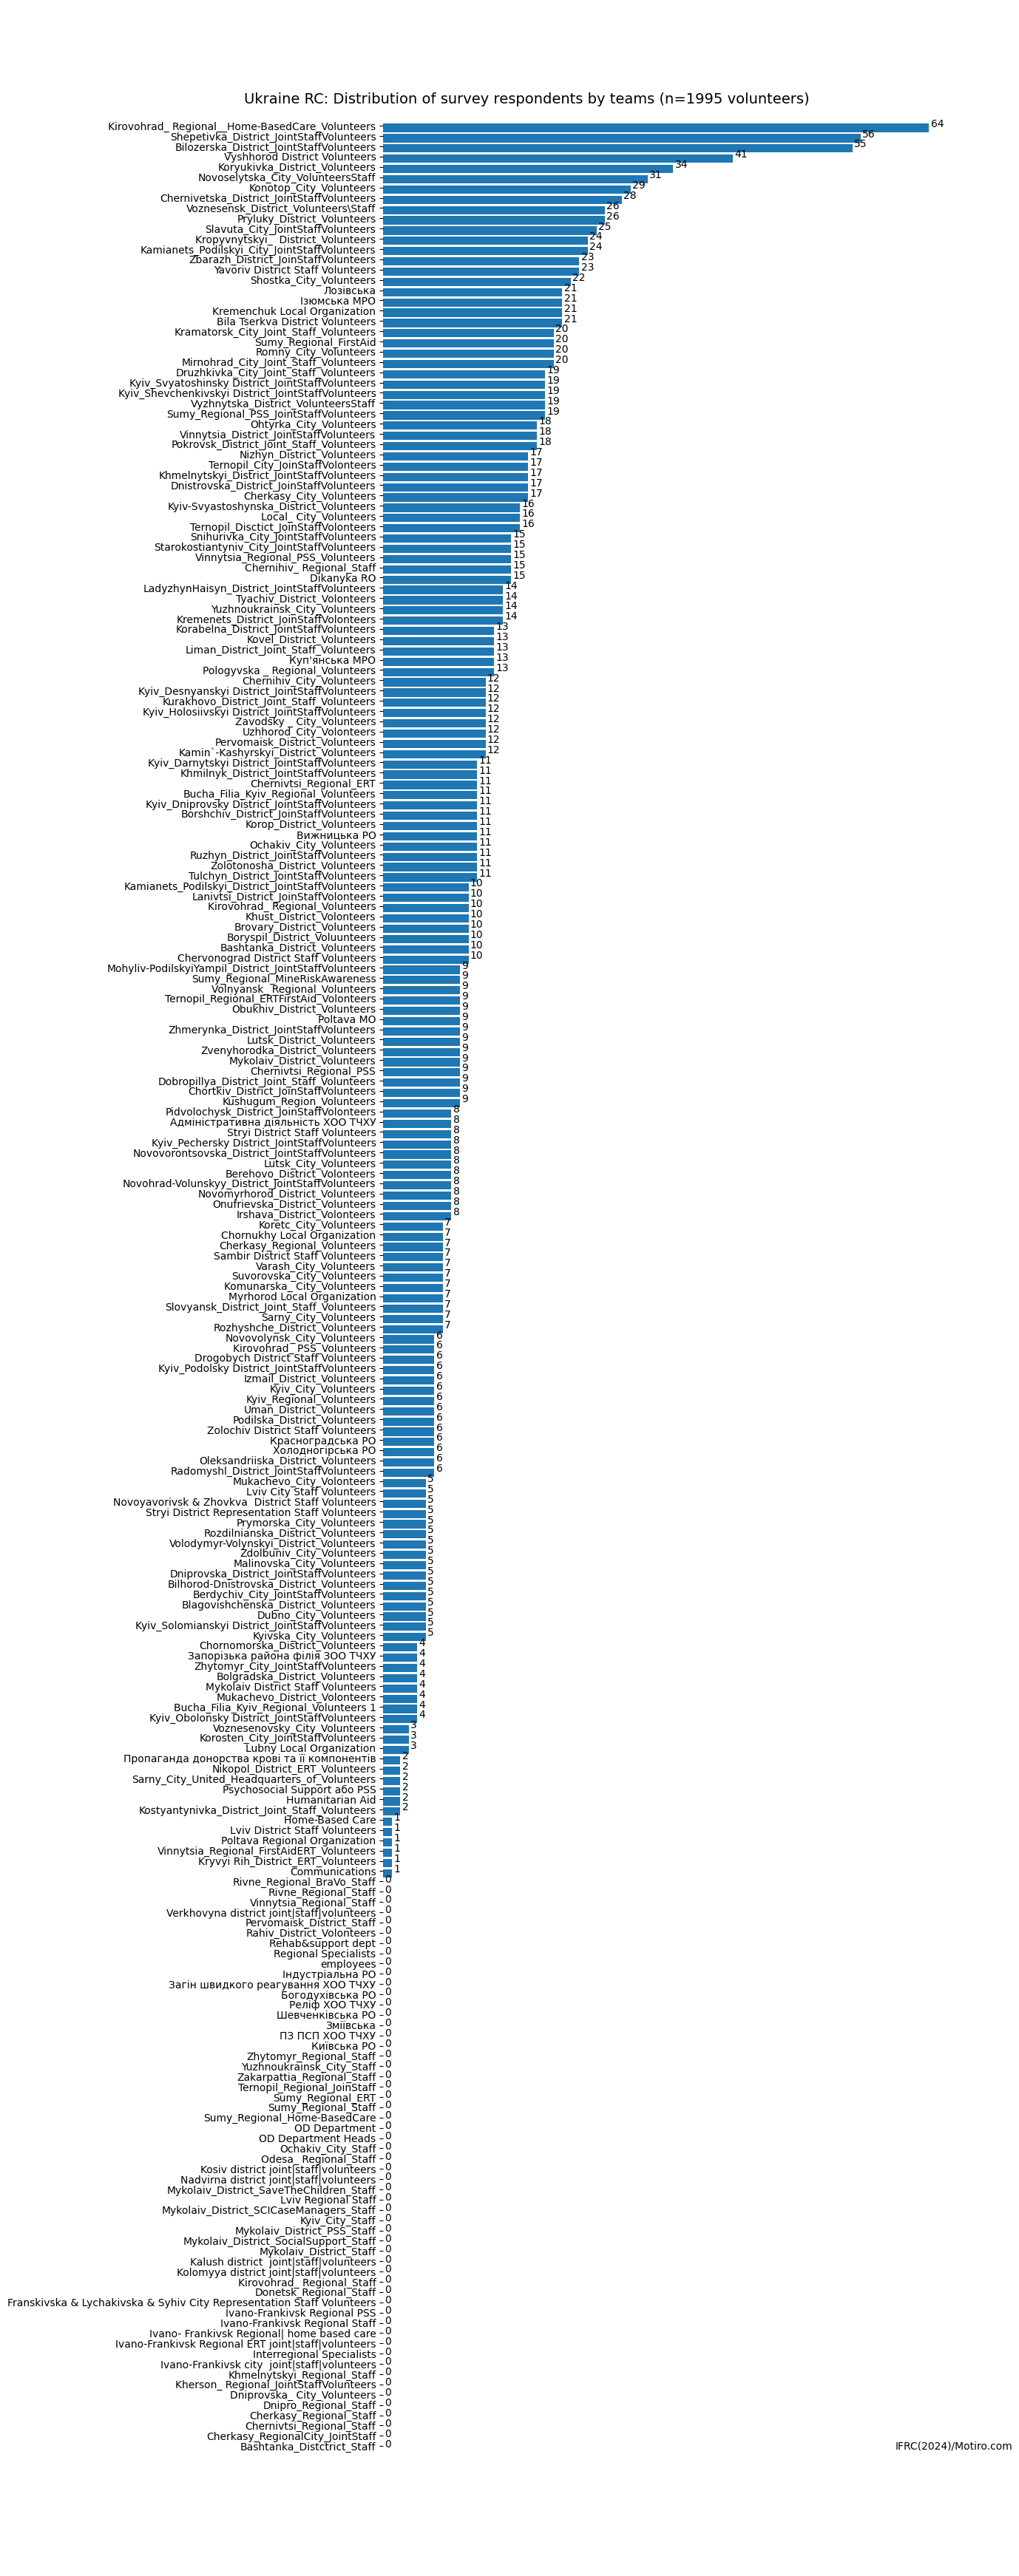

In [ ]:
#  UKRAINE RED CROSS - DATA DESCRIPTION - Volunteer Teams

df = pd.read_csv('URC_ALL.txt', sep=",", encoding='utf-8')
df.shape

# Drop from illegitimate teams from dataframe
df = df.drop(df[df['region'] =='dk'].index)
df.shape

# Group the dataframe by teams and calculate the sum of 'Volunteer' 
grouped_df = df.groupby('Team Name').agg({'Volunteer': 'sum'}).sort_values('Volunteer', ascending=True)

# Count the total number of respondents (n)
n = df['Volunteer'].sum()
print(n)

# Get the list of teams
Teams = grouped_df.index

# Set the height of each bar
bar_height = 0.4

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 45))

# Create an array of indices for the y-axis positions
y = np.arange(len(Teams))

# Plot the bars for volunteers
ax.barh(y, grouped_df['Volunteer'], height=bar_height*2, label='Volunteer', )
#ax.axvline(x=5, color='gray', linestyle='--')

# remove frame around the plot
sns.despine(ax=None, top=True, right=True, left=True, bottom=True, offset=0, trim=False)

# Plot the bars for staff
# ax.barh(y + bar_height, grouped_df['Staff'], height=bar_height, label='Staff', color='C1')

# Set the y-axis ticks and labels
ax.set_yticks(y + bar_height/2)
ax.set_yticklabels(Teams, size=10)

# Set the x-axis label
#ax.set_xlabel('Number of Respondents')

#remove x axis
plt.xticks([]) 

#annotate bar plot with values
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), size=10)
 
plt.text(60, -0.1, "IFRC(2024)/Motiro.com", fontdict={'size': 10})
ax.set_title(f'Ukraine RC: Distribution of survey respondents by teams (n={n} volunteers)', x=0.25, y=0.96, fontsize=14)

# Adjust the layout to accommodate the y-axis labels
#plt.tight_layout()

plt.savefig('URC-VolRespondentsByTeam.png', bbox_inches='tight', pad_inches=-0)
# Show the plot
plt.show()


565


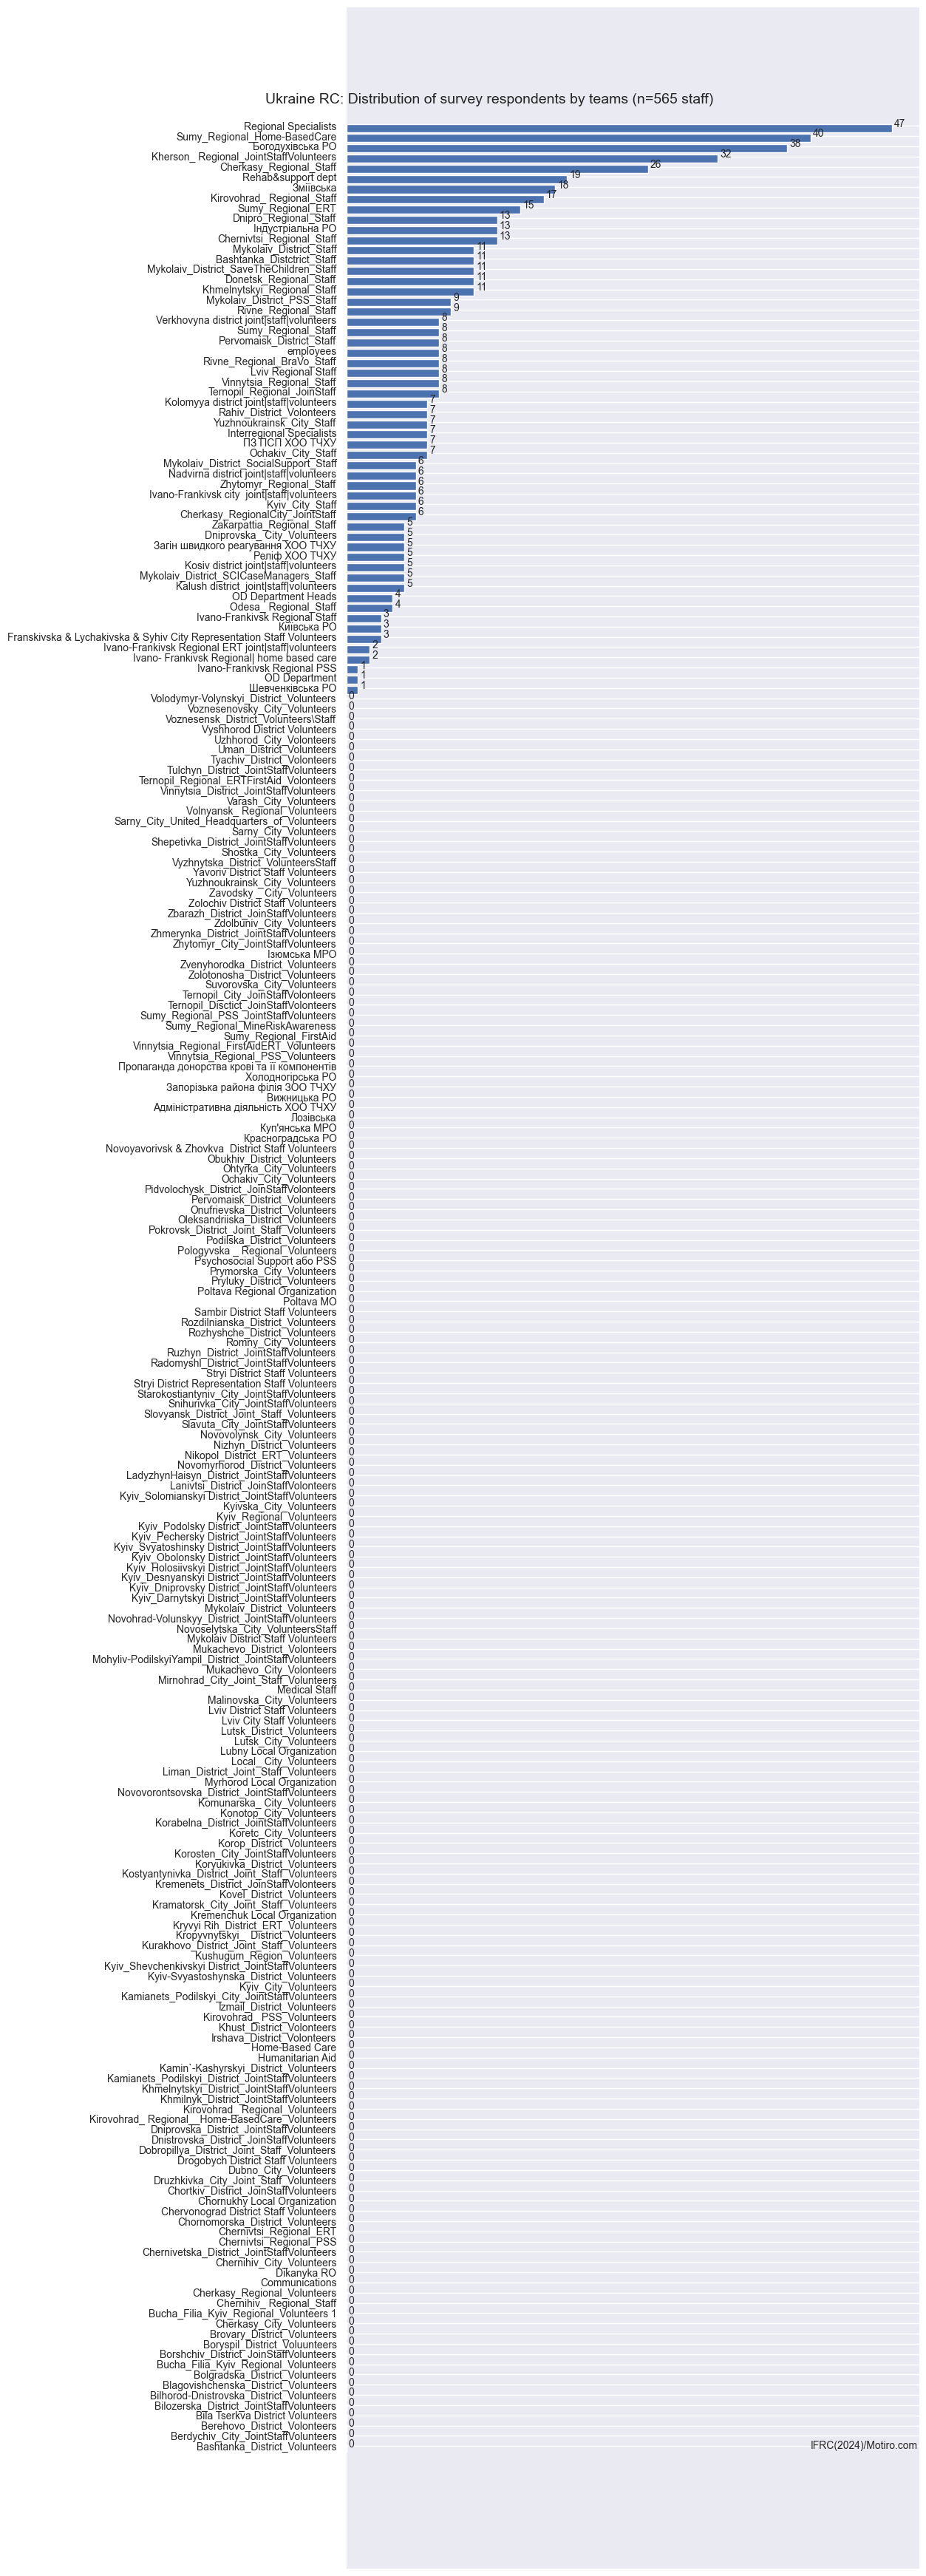

In [74]:
#  UKRAINE RED CROSS - DATA DESCRIPTION - Staff Teams

df = pd.read_csv('URC_ALL.txt', sep=",", encoding='utf-8')
df.shape

# Drop from illegitimate teams from dataframe
df = df.drop(df[df['region'] =='dk'].index)
df.shape

# Group the dataframe by teams and calculate the sum of 'Volunteer' 
grouped_df = df.groupby('Team Name').agg({'Staff': 'sum'}).sort_values('Staff', ascending=True)

# Count the total number of respondents (n)
n = df['Staff'].sum()
print(n)

# Get the list of teams
Teams = grouped_df.index

# Set the height of each bar
bar_height = 0.4

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 45))

# Create an array of indices for the y-axis positions
y = np.arange(len(Teams))

# Plot the bars for volunteers
ax.barh(y, grouped_df['Staff'], height=bar_height*2, label='Staff', )
#ax.axvline(x=5, color='gray', linestyle='--')

# remove frame around the plot
sns.despine(ax=None, top=True, right=True, left=True, bottom=True, offset=0, trim=False)

# Plot the bars for staff
# ax.barh(y + bar_height, grouped_df['Staff'], height=bar_height, label='Staff', color='C1')

# Set the y-axis ticks and labels
ax.set_yticks(y + bar_height/2)
ax.set_yticklabels(Teams, size=10)

# Set the x-axis label
#ax.set_xlabel('Number of Respondents')

#remove x axis
plt.xticks([]) 

#annotate bar plot with values
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), size=10)
 
plt.text(40, -0.1, "IFRC(2024)/Motiro.com", fontdict={'size': 10})
ax.set_title(f'Ukraine RC: Distribution of survey respondents by teams (n={n} staff)', x=0.25, y=0.96, fontsize=14)

# Adjust the layout to accommodate the y-axis labels
#plt.tight_layout()

plt.savefig('URC-StaffRespondentsByTeam.png', bbox_inches='tight', pad_inches=-0)
# Show the plot
plt.show()


1996 6366 8362


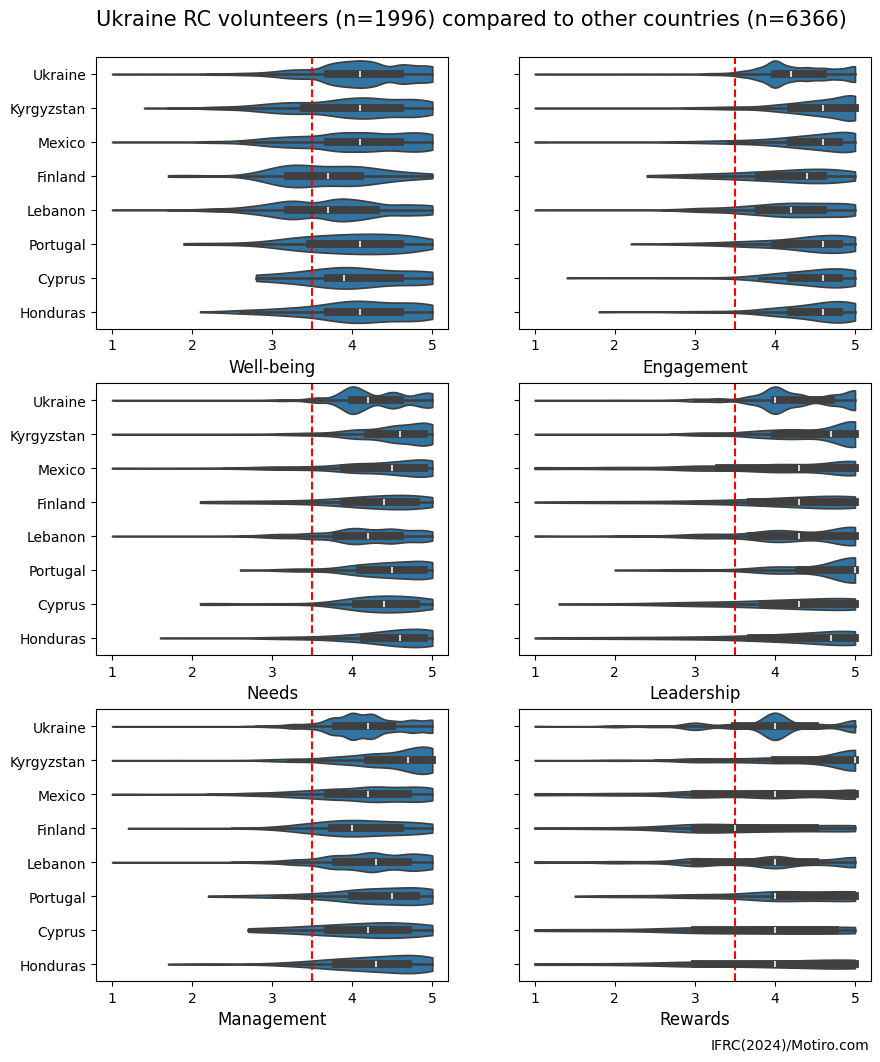

In [12]:
# Compare URC with volunteer benchmaks from other countries
file_path = "ungrouped_ALL_with_regions.txt"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
VOL_df = df[df['Position'] == 'Volunteer'].copy()

# Get the DataFrame for teams from 'Ukraine'
URC_df = pd.read_csv("URC_ALL.txt")

#count the number of volunteers from Ukraine
n_URC =  URC_df['Volunteer'].sum()

# Filter the DataFrame for selected countries with many volunteers
Country_df = VOL_df[VOL_df['Country'].isin(['Ukraine', 'Lebanon', 'Mexico', 'Honduras', 'Portugal', 'Kyrgyzstan', 'Finland', 'Cyprus'])].copy()

#count the number of volunteers from the other countries
n_country =  Country_df['Volunteer'].sum()

#total sample for the graphs:
n = n_URC + n_country

print(n_URC, n_country, n)

# Merge the two dataframes
URC_df = pd.concat([URC_df, Country_df], ignore_index=True)

# violin plots by team for selected variables
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Needs'),
    ('Leadership'),
    ('Management'),
    ('Rewards')
    ]

# Create a 3x2 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12), sharex=False, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax.axvline(x=3.5, color='red', linestyle='--')
    ax=sns.violinplot(
        data=URC_df, x=x_var,
        y='Country', #replace team name with circle to group URC teams
        cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
        
plt.suptitle(f'Ukraine RC volunteers (n={n_URC}) compared to other countries (n={n_country})', x=0.5, y=0.92, fontsize=15)
plt.text(3.2, 9.5, "IFRC(2024)/Motiro.com", fontdict={'size': 10})

plt.savefig('URC_countries.png', bbox_inches='tight', pad_inches=0.1)

1996 6366 8362


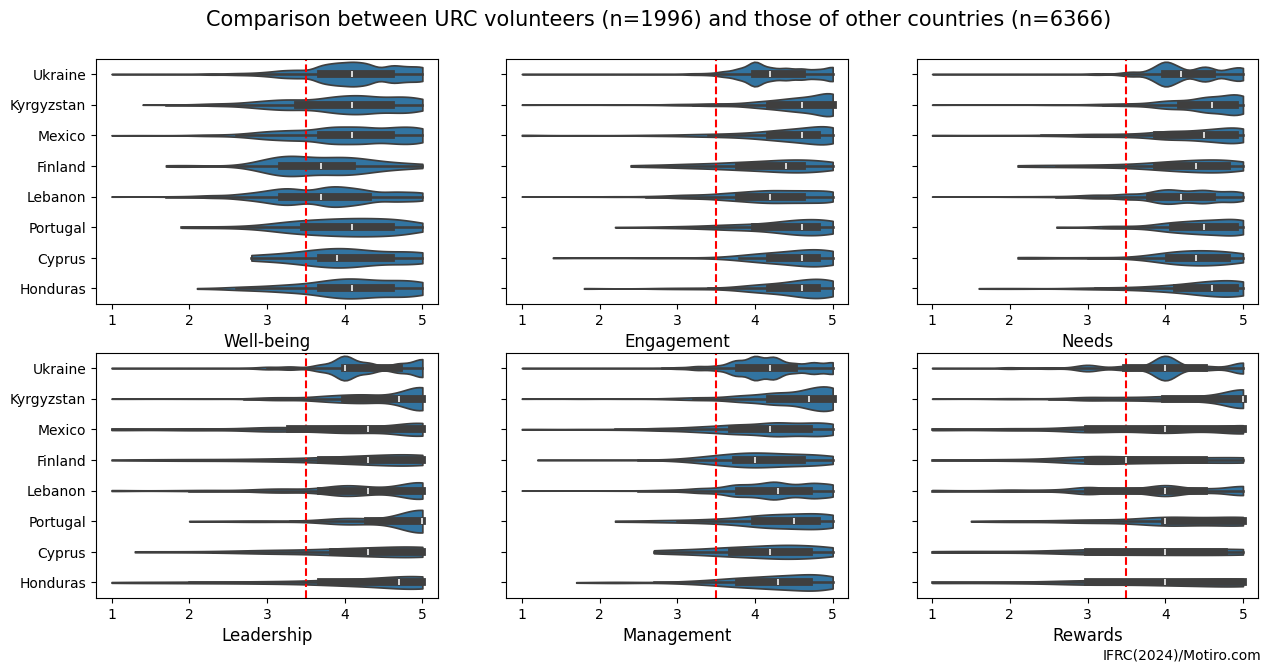

In [13]:
# SLIDE. Compare URC with volunteer benchmaks from other countries
file_path = "ungrouped_ALL_with_regions.txt"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
VOL_df = df[df['Position'] == 'Volunteer'].copy()

# Get the DataFrame for teams from 'Ukraine'
URC_df = pd.read_csv("URC_ALL.txt")

#count the number of volunteers from Switzerland
n_URC =  URC_df['Volunteer'].sum()

# Filter the DataFrame for selected countries with many volunteers
Country_df = VOL_df[VOL_df['Country'].isin(['Ukraine', 'Lebanon', 'Mexico', 'Honduras', 'Portugal', 'Kyrgyzstan', 'Finland', 'Cyprus'])].copy()

#count the number of volunteers from the other countries
n_country =  Country_df['Volunteer'].sum()

#total sample for the graphs:
n = n_URC + n_country

print(n_URC, n_country, n)

# Merge the two dataframes
URC_df = pd.concat([URC_df, Country_df], ignore_index=True)

# violin plots by team for selected variables
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Needs'),
    ('Leadership'),
    ('Management'),
    ('Rewards')
    ]

# Create a 3x2 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7), sharex=False, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax.axvline(x=3.5, color='red', linestyle='--')
    ax=sns.violinplot(
        data=URC_df, x=x_var,
        y='Country', #replace team name with circle to group URC teams
        cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
        
plt.suptitle(f"Comparison between URC volunteers (n={n_URC}) and those of other countries (n={n_country})", 
             x=0.5, y=0.95, fontsize=15)
plt.text(3.2, 9.5, "IFRC(2024)/Motiro.com", fontdict={'size': 10})

plt.savefig('URC_countries slide.png', bbox_inches='tight', pad_inches=0.1)

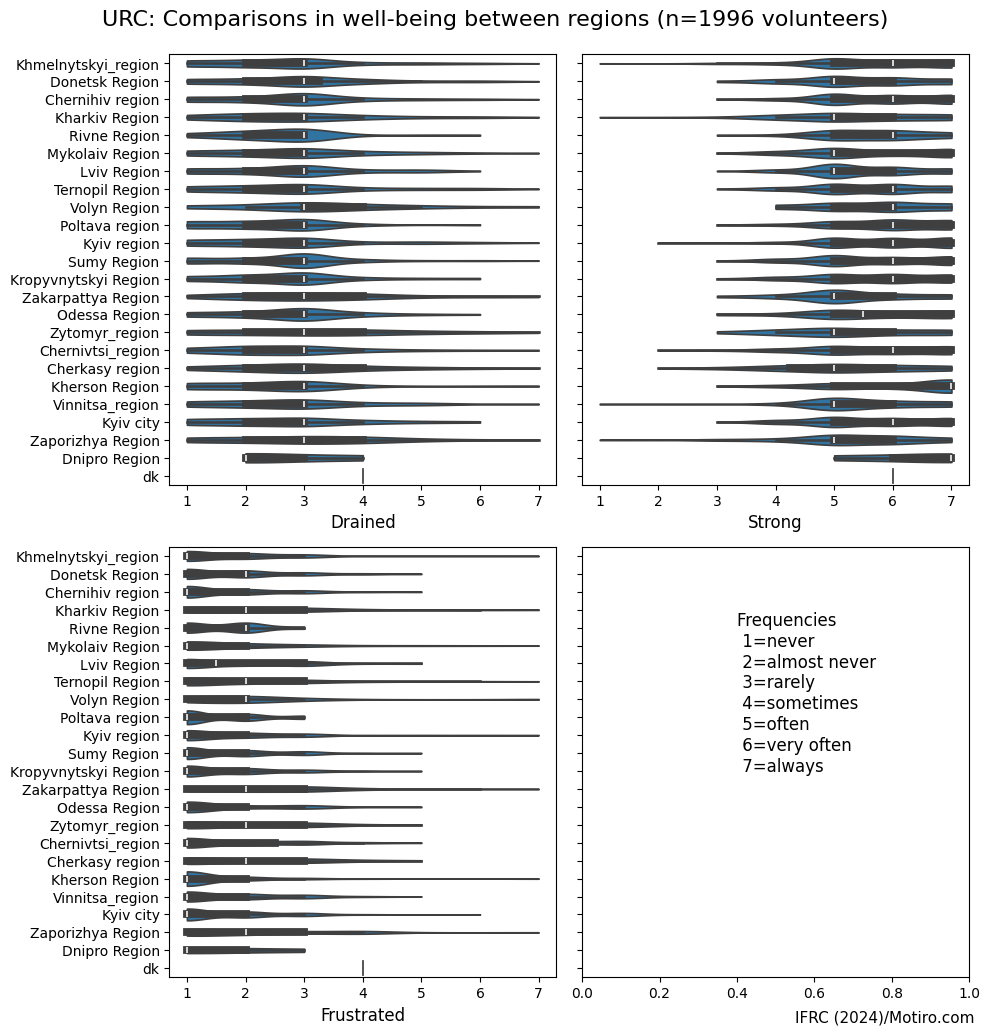

In [14]:
# Compare Ukraine RC regions in VOLUNTEER WELL-BEING
# plot includes only 3 questions are on a frequency scale of 7 to avoid confusion.
# Get the DataFrame for teams from 'Ukraine'
df = pd.read_csv("URC_ALL.txt")

#count the number of respondents from Ukraine
n =  df['Volunteer'].sum()

# Filter the dataframe for 'Position' = 'Volunteer'
VOL_df = df[df['Position'] == 'Volunteer'].copy()

# violin plots by team for selected variables
variables = [
    ('Drained'),
    ('Strong'),
    ('Frustrated')
    ]

# Create a 2x2 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=False, sharey=True)
sns.set_style(style=None, rc=None)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax=sns.violinplot(
        data=VOL_df, x=x_var,
        y='region',
        cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
        
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'URC: Comparisons in well-being between regions (n={n} volunteers)', x=0.5, y=1.03, fontsize=16)

plt.text(0.4, 12,
"Frequencies \n 1=never \n 2=almost never \n 3=rarely \n 4=sometimes \n 5=often \n 6=very often \n 7=always",
fontdict={'size': 12})

plt.text(0.55, 26, "IFRC (2024)/Motiro.com", fontdict={'size': 11})

plt.savefig('URC_Team Wellbeing frequencies violinplots.png', bbox_inches='tight', pad_inches=0.1)

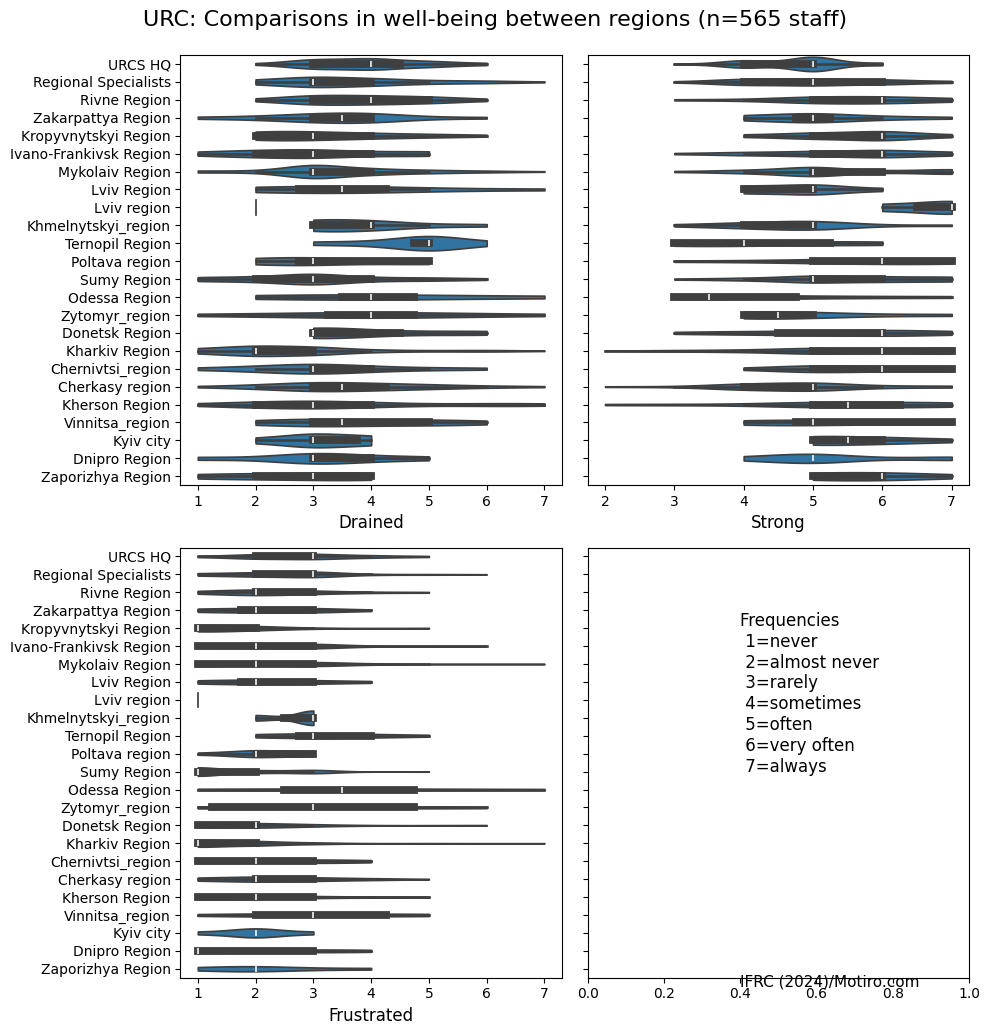

In [15]:
# Compare Ukraine RC regions in STAFF WELL-BEING
# plot includes only 3 questions are on a frequency scale of 7 to avoid confusion.
# Get the DataFrame for teams from 'Ukraine'
df = pd.read_csv("URC_ALL.txt")

#count the number of respondents from Ukraine
n =  df['Staff'].sum()

# Filter the dataframe for 'Position' = 'Staff'
Staff_df = df[df['Position'] == 'Staff'].copy()

# violin plots by team for selected variables
variables = [
    ('Drained'),
    ('Strong'),
    ('Frustrated')
    ]

# Create a 2x2 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=False, sharey=True)
sns.set_style(style=None, rc=None)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax=sns.violinplot(
        data=Staff_df, x=x_var,
        y='region',
        cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
        
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'URC: Comparisons in well-being between regions (n={n} staff)', x=0.5, y=1.03, fontsize=16)

plt.text(0.4, 12,
"Frequencies \n 1=never \n 2=almost never \n 3=rarely \n 4=sometimes \n 5=often \n 6=very often \n 7=always",
fontdict={'size': 12})

plt.text(0.4, 24, "IFRC (2024)/Motiro.com", fontdict={'size': 11})

plt.savefig('URC_Team Wellbeing frequencies violinplots.png', bbox_inches='tight', pad_inches=0.1)

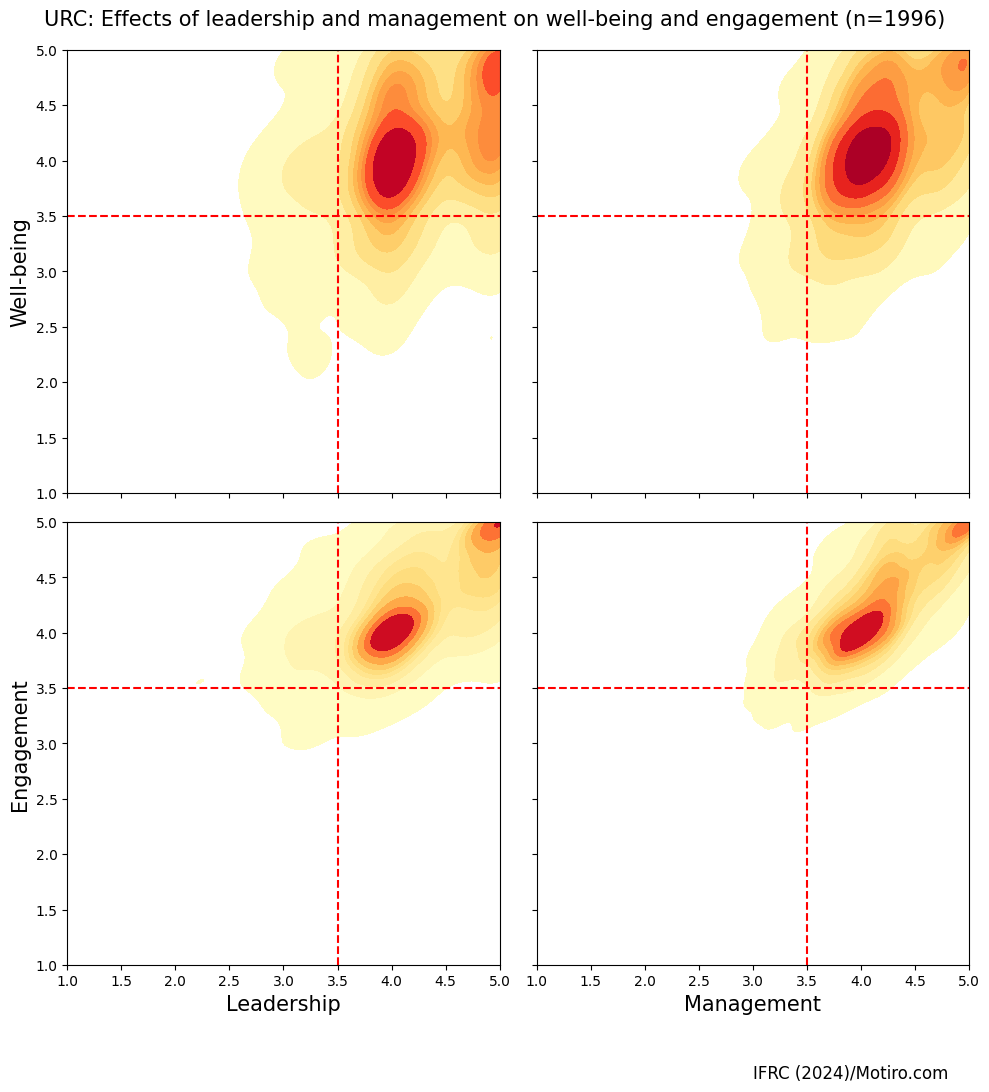

In [ ]:
# Combined heatmaps Ukraine RED CROSS
df = pd.read_csv("URC_ALL.txt")

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Well-being'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Engagement'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Engagement'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(15)

# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'URC: Effects of leadership and management on well-being and engagement (n={n} volunteers)',
             y=1.02, x=0.5, size=15)

plt.text(3, -0.02, "IFRC (2024)/Motiro.com", fontdict={'size': 12})

plt.savefig('URC heatmaps WB,Eng - Lead,Mgt.png', bbox_inches='tight', pad_inches=0)

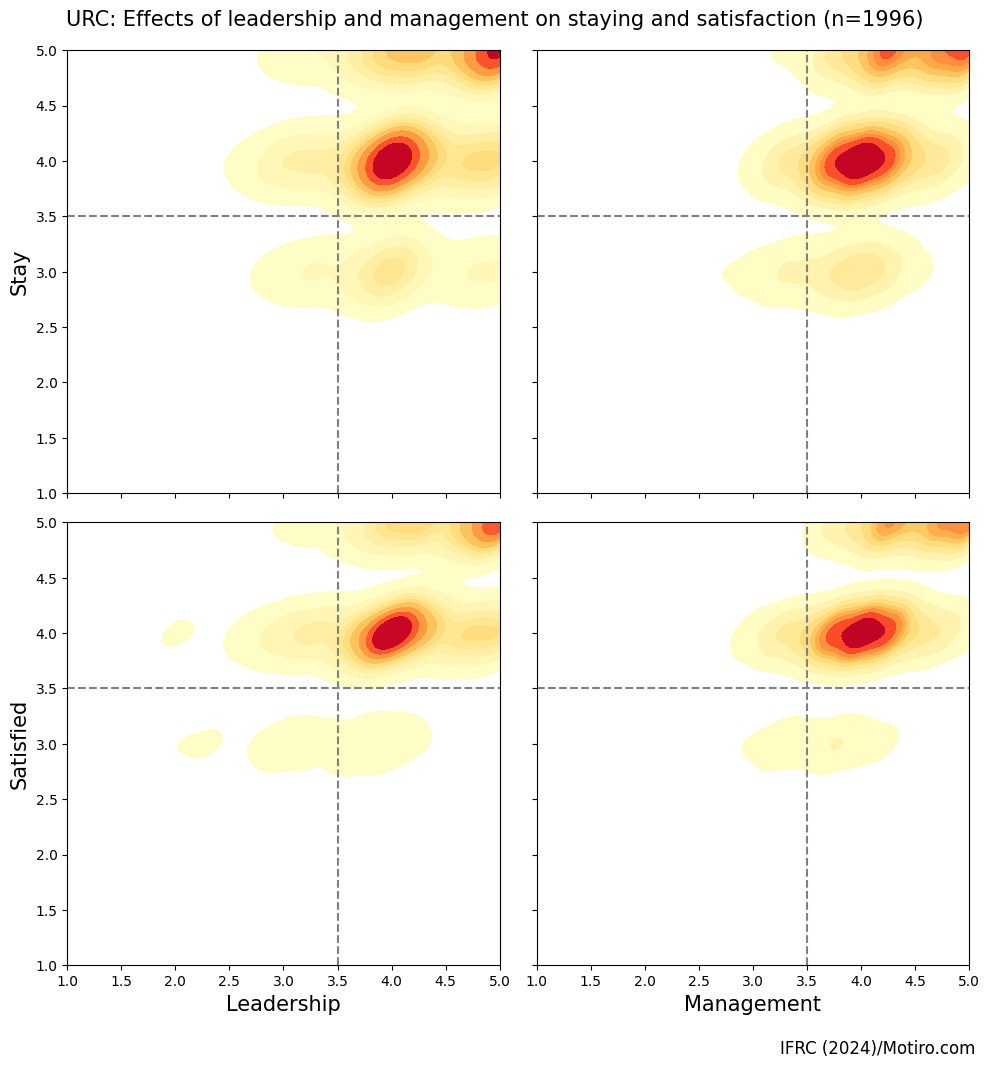

In [ ]:
# Combined heatmaps UKRAINE RED CROSS
df = pd.read_csv("URC_ALL.txt")

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)

# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'URC: Effects of leadership and management on staying and satisfaction (n={n} volunteers)',
             y=1.02, x=0.5, size=15)

plt.text(3.25, 0.2, "IFRC (2024)/Motiro.com", fontdict={'size': 12})

plt.savefig('URC stay heatmaps.png', bbox_inches='tight', pad_inches=0)

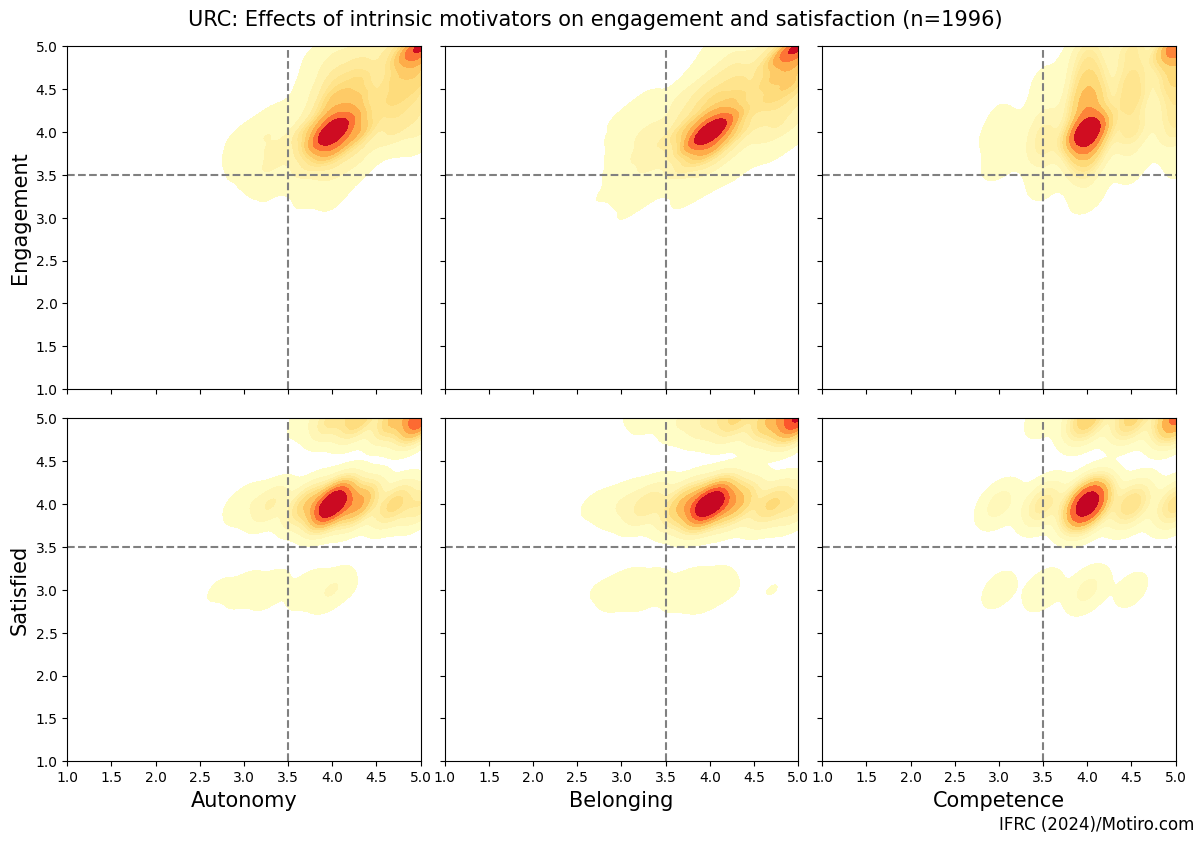

In [ ]:
# SLIDE Combined heatmaps UKRAINE RED CROSS values, engagement, well-being and 3 needs
df = pd.read_csv("URC_ALL.txt")

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Engagement'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Engagement'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Engagement'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'URC: Effects of intrinsic motivators on engagement and satisfaction (n={n} volunteers)',
             y=1.02, x=0.5, size=15)

plt.text(3, 0.2, "IFRC (2024)/Motiro.com", fontdict={'size': 12})

plt.savefig('URC stay heatmaps Slide.png', bbox_inches='tight', pad_inches=0)

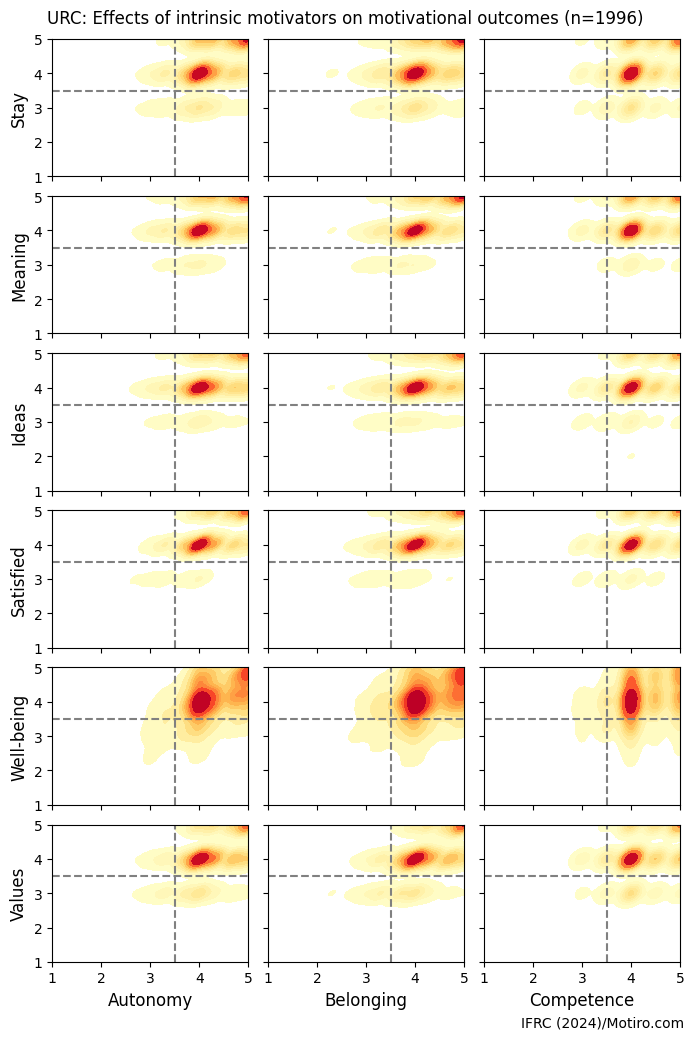

In [ ]:

# Combined heatmaps UKRAINE RED CROSS 6 outcomes and 3 needs
df = pd.read_csv("URC_ALL.txt")

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(6, 3, figsize=(7, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Stay'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Meaning'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[2, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Ideas'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[2, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[2, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[3, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[3, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[3, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[4, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[4, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[4, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[5, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Values'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[5, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[5, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'URC: Effects of intrinsic motivators on motivational outcomes (n={n} volunteers)',
             y=1.015, x=0.5, size=12)

plt.text(1.75, -0.9, "IFRC (2024)/Motiro.com", fontdict={'size': 10})

plt.savefig('URC outcome-3needs heatmaps.png', bbox_inches='tight', pad_inches=0)

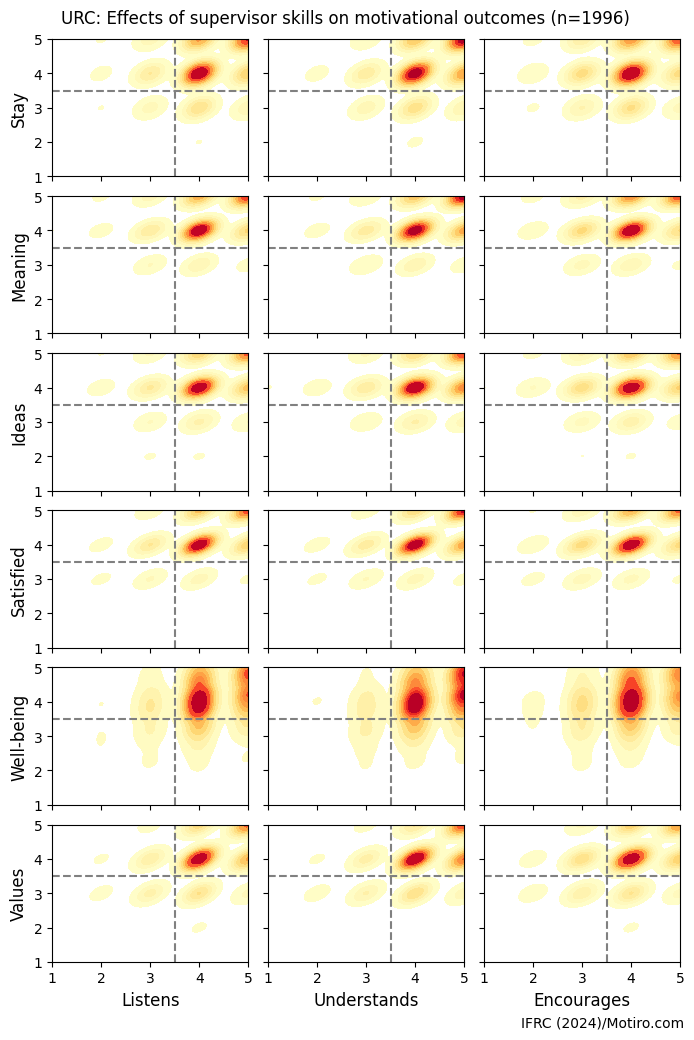

In [ ]:

# Combined heatmaps UKRAINE RED CROSS 6 outcomes and 3 leadership skills
df = pd.read_csv("URC_ALL.txt")

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(6, 3, figsize=(7, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Stay'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Meaning'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[2, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Ideas'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[2, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[2, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[3, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[3, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[3, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[4, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[4, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[4, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[5, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Values'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[5, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[5, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'URC: Effects of supervisor skills on motivational outcomes (n={n} volunteers)',
             y=1.015, x=0.5, size=12)

plt.text(1.75, -0.9, "IFRC (2024)/Motiro.com", fontdict={'size': 10})

plt.savefig('URC outcome-leadership heatmaps.png', bbox_inches='tight', pad_inches=0)

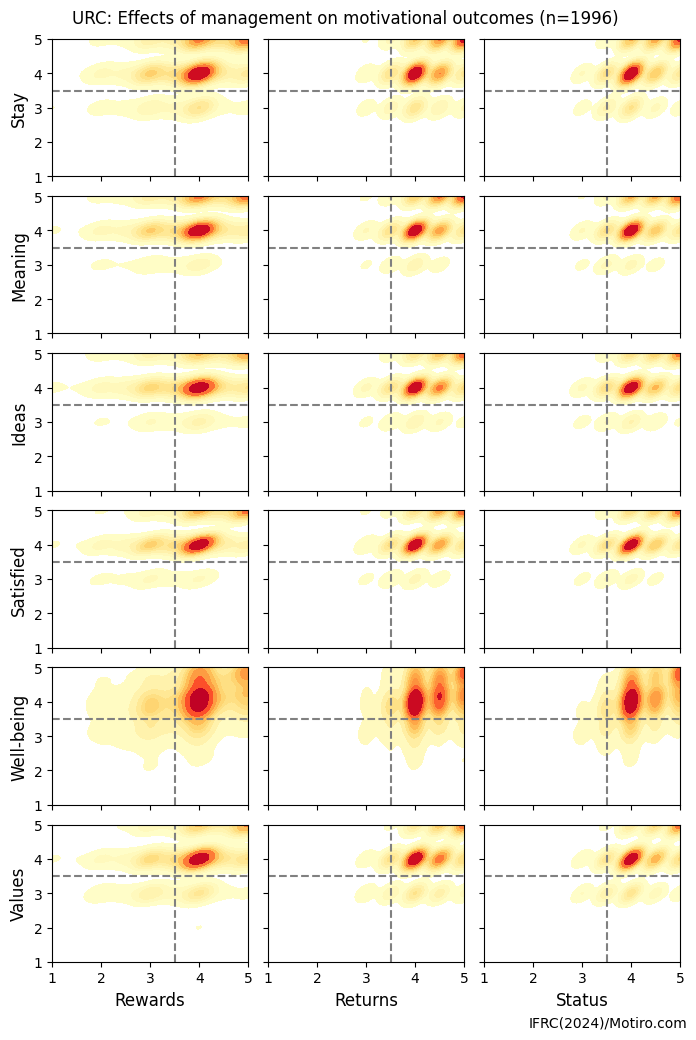

In [ ]:

# Combined heatmaps UKRAINE RED CROSS 6 outcomes and 3 Management incentives
df = pd.read_csv("URC_ALL.txt")

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(6, 3, figsize=(7, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Stay'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Meaning'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[2, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Ideas'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[2, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[2, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[3, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[3, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[3, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[4, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[4, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[4, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[5, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Values'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[5, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[5, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'URC: Effects of management on motivational outcomes (n={n} volunteers)',
             y=1.015, x=0.5, size=12)

plt.text(1.9, -0.9, "IFRC(2024)/Motiro.com", fontdict={'size': 10})

plt.savefig('URC outcome-Management heatmaps.png', bbox_inches='tight', pad_inches=0)

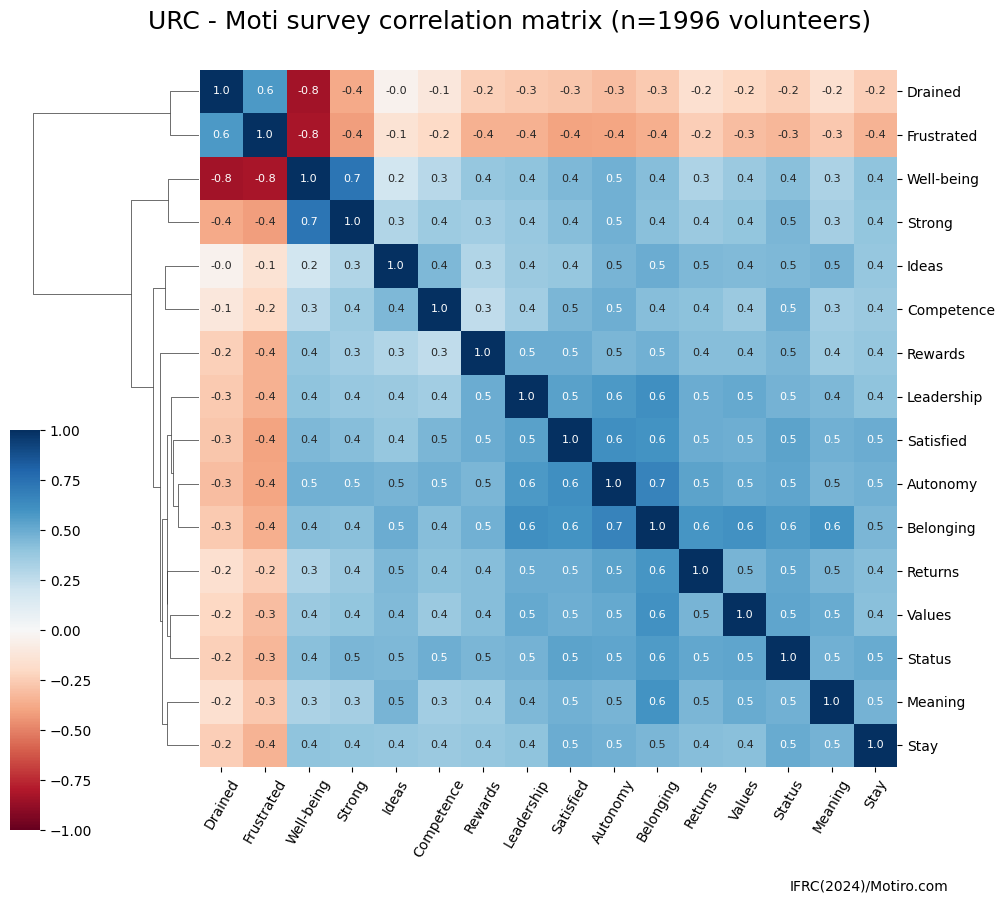

In [23]:
# Summary correlation matrix with grouped scores Ukraine Red Cross

df = pd.read_csv("URC_ALL.txt")

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

columns = ['Well-being',
           'Ideas',
           'Meaning',
           'Values',
           'Autonomy',
           'Belonging',
           'Competence',
           'Leadership',
           'Returns',
           'Rewards',
           'Status',
           'Satisfied',
           'Stay',
           'Strong',
           'Drained',
           'Frustrated']

# Create the table with the desired columns
df = df[columns]

g = sns.clustermap(df.corr(), 
                   method = 'complete', 
                   #row_cluster=False,
                   cmap   = 'RdBu', vmin=-1, vmax=1,
                   cbar_pos=(0, .05, .03, .4),
                   annot  = True , fmt=".1f",
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

g.ax_col_dendrogram.remove()

plt.suptitle(f'URC - Moti survey correlation matrix (n={n} volunteers)',
             x=0.5, y=0.87, fontsize=18)
plt.text(26, -1.3, "IFRC(2024)/Motiro.com")

# Show the plot
plt.savefig('URC Summary Correlation Matrix.png', bbox_inches='tight', pad_inches=0)
plt.show()


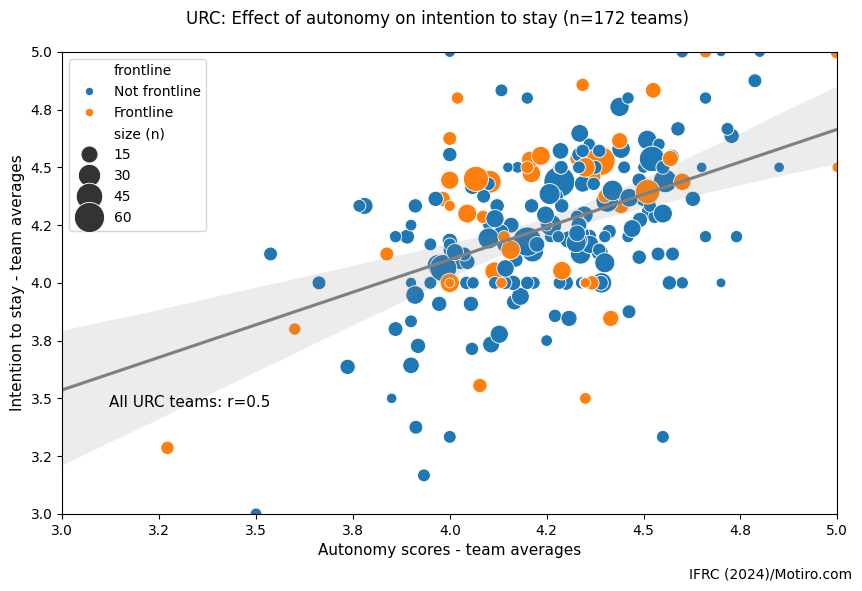

In [28]:
# SWISS RED CROSS: EFFECTS OF AUTONOMY ON ENGAGEMENT
df = pd.read_csv("URC_team.txt")
   
# Count the total number of respondents (n)
n = df['Volunteer'].sum()

# Create the bubble graph
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=team_df, x='Autonomy', y='Stay', size='size (n)',
                hue='frontline', sizes=(50, 500))
plt.xlim((3,5))
plt.ylim((3,5))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))

sns.regplot(data=team_df, x='Autonomy', y='Stay', color='gray', scatter=False)

# Calculate and display correlation coefficients
volunteer_corr = pearsonr(df['Autonomy'], df['Stay'])[0]

# Add correlation coefficient labels within the plot area
plt.text(0.06, 0.231, f'All URC teams: r={volunteer_corr:.1f}', color='black',
         size=11, transform=plt.gca().transAxes)

# Set the labels and title
plt.xlabel('Autonomy scores - team averages', fontsize=11)
plt.ylabel('Intention to stay - team averages', fontsize=11)

plt.suptitle(f'URC: Effect of autonomy on intention to stay (n={n:.0f} teams)',
             x=0.5, y=0.95, fontsize=12)
plt.annotate("IFRC (2024)/Motiro.com", xy=(0.8,-0.1), xycoords="axes fraction",
                    xytext=(5,-5), textcoords="offset points",
                    ha="left", va="top")
# Save and show the plot
plt.savefig('URC-Autonomy_vs_Stay.png', bbox_inches='tight', pad_inches=0)
plt.show()

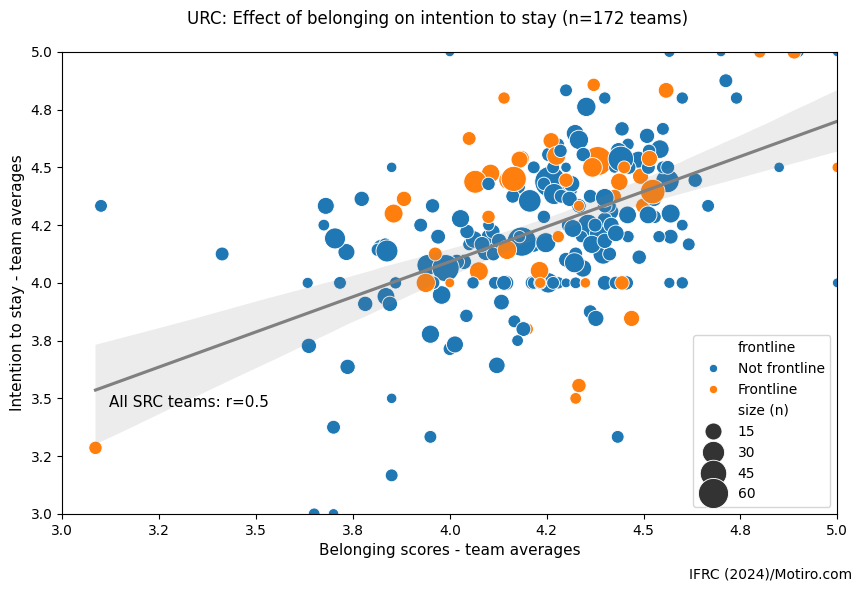

In [29]:
# UKRAINE RED CROSS: EFFECTS OF BELONGING ON INTENTION TO STAY
df = pd.read_csv("URC_team.txt")
   
# Count the total number of respondents (n)
n = df['Volunteer'].sum()

# Create the bubble graph
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=team_df, x='Belonging', y='Stay', size='size (n)',
                hue='frontline', sizes=(50, 500))
plt.xlim((3,5))
plt.ylim((3,5))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))

sns.regplot(data=team_df, x='Belonging', y='Stay', color='gray', scatter=False)

# Calculate and display correlation coefficients
volunteer_corr = pearsonr(df['Belonging'], df['Stay'])[0]

# Add correlation coefficient labels within the plot area
plt.text(0.06, 0.231, f'All SRC teams: r={volunteer_corr:.1f}', color='black',
         size=11, transform=plt.gca().transAxes)

# Set the labels and title
plt.xlabel('Belonging scores - team averages', fontsize=11)
plt.ylabel('Intention to stay - team averages', fontsize=11)

plt.suptitle(f'URC: Effect of belonging on intention to stay (n={n:.0f} teams)',
             x=0.5, y=0.95, fontsize=12)
plt.annotate("IFRC (2024)/Motiro.com", xy=(0.8,-0.1), xycoords="axes fraction",
                    xytext=(5,-5), textcoords="offset points",
                    ha="left", va="top")
# Save and show the plot
plt.savefig('URC-Belonging_vs_Stay.png', bbox_inches='tight', pad_inches=0)
plt.show()

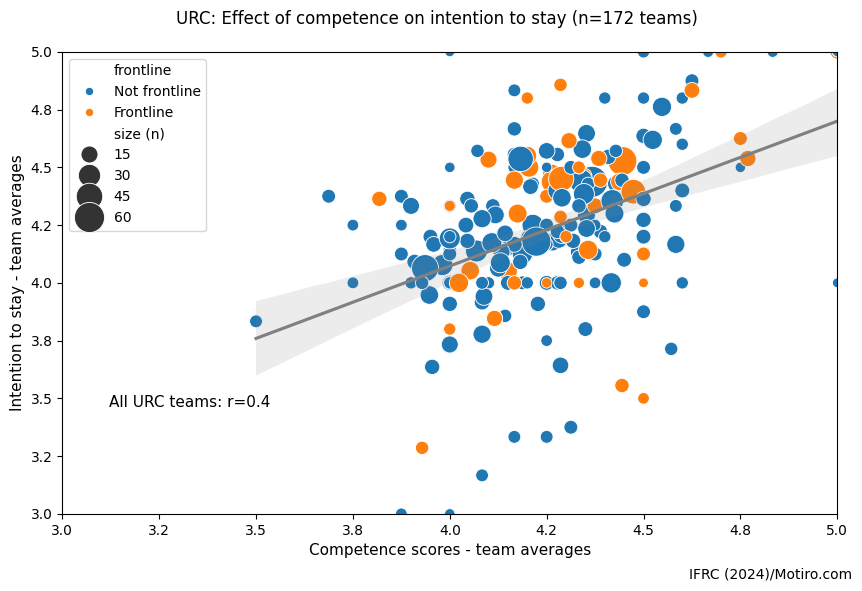

In [35]:
# UKRAINE RED CROSS: EFFECTS OF COMPETENCE ON INTENTION TO STAY
df = pd.read_csv("URC_team.txt")
   
# Count the total number of respondents (n)
n = df['Volunteer'].sum()

# Create the bubble graph
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=team_df, x='Competence', y='Stay', size='size (n)',
                hue='frontline', sizes=(50, 500))
plt.xlim((3,5))
plt.ylim((3,5))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))

sns.regplot(data=team_df, x='Competence', y='Stay', color='gray', scatter=False)

# Calculate and display correlation coefficients
volunteer_corr = pearsonr(df['Competence'], df['Stay'])[0]

# Add correlation coefficient labels within the plot area
plt.text(0.06, 0.231, f'All URC teams: r={volunteer_corr:.1f}', color='black',
         size=11, transform=plt.gca().transAxes)

# Set the labels and title
plt.xlabel('Competence scores - team averages', fontsize=11)
plt.ylabel('Intention to stay - team averages', fontsize=11)

plt.suptitle(f'URC: Effect of competence on intention to stay (n={n:.0f} teams)',
             x=0.5, y=0.95, fontsize=12)
plt.annotate("IFRC (2024)/Motiro.com", xy=(0.8,-0.1), xycoords="axes fraction",
                    xytext=(5,-5), textcoords="offset points",
                    ha="left", va="top")
# Save and show the plot
plt.savefig('URC-Competence_vs_Stay.png', bbox_inches='tight', pad_inches=0)
plt.show()

Note: you may need to restart the kernel to use updated packages.
Well-being Needs 0.2394176035822645 0.48930318165965825
Well-being Autonomy 0.23253936472230796 0.4822233556375178
Well-being Belonging 0.1818305325589915 0.4264159149926179
Well-being Competence 0.07569973305803668 0.27513584473499025
Well-being Leadership 0.16406233465719244 0.40504608954684707
Well-being Understands 0.16354414271667828 0.40440591330577536
Well-being Encourages 0.09611459138457457 0.31002353359797474
Well-being Listens 0.1343357249512086 0.366518382828486
Well-being Management 0.21395340098660376 0.4625509712308512
Well-being Returns 0.09752709914622637 0.3122932902677007
Well-being Rewards 0.14692857844983687 0.38331263799911014
Well-being Status 0.17503065440021426 0.41836665067882056
Well-being Front 0.0002356238641608721 0.015350044435143245
Satisfied Needs 0.463835649791013 0.6810548067453992
Satisfied Autonomy 0.3788209062503204 0.6154842859491381
Satisfied Belonging 0.3578855973331311 0.59823540

C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_32416\1954686502.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


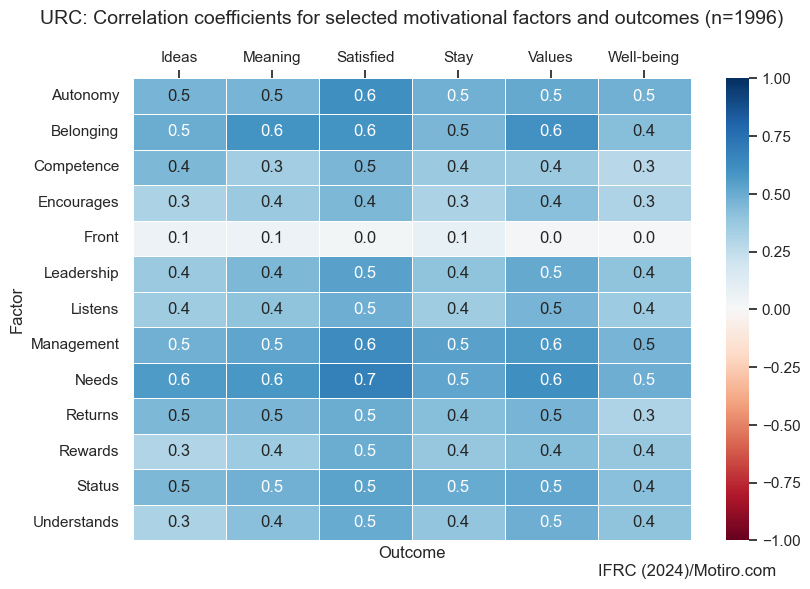

In [50]:
#  COUNTRY PROFILE: UKRAINE
#  CORRELATION COEFFICIENTS for staying, being staisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using Linear regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

# %pip install scikit-learn
%pip install openpyxl

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

df = pd.read_csv('URC_ALL.txt')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

columnY = ['Well-being', 'Satisfied', 'Meaning', 'Values', 'Ideas', 'Stay'] 
columnX = ['Needs', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Understands', 'Encourages', 'Listens',
           'Management', 'Returns', 'Rewards', 'Status', 'Front']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'CorrCoef'])

for Y in columnY:
    for X in columnX:
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        model = LinearRegression().fit(X_data, Y_data)
        r_sq = model.score(X_data, Y_data)
        r = np.sqrt(r_sq)
        print(Y, X, r_sq, r)
        # Append results to the results_df DataFrame
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'CorrCoef': [r]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)


# Display the results DataFrame
#print(results_df)

# Save the results DataFrame to a CSV file
results_df.to_csv('CorrCoef_URC.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='CorrCoef')

# Display the pivot_table
#print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel('CorrCoef_PivotTable_URC.xlsx', index=False)      

# heatmap to represent odds ratios for LEBANESE RED CROSS only (all are volunteers)
sns.set_theme()

df = pd.read_csv('CorrCoef_URC.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='CorrCoef')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", vmin=-1, vmax=1, linewidths=.5, cmap='RdBu', ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5, 14, "IFRC (2024)/Motiro.com", fontdict={'size': 12})
plt.title(f'URC: Correlation coefficients for selected motivational factors and outcomes (n={n})', 
          x=0.5, y=1.1, fontsize=14)

# Save the plot as an image file
plt.savefig('URC_r_heatmap.png', bbox_inches='tight', pad_inches=0)

Well-being Needs 0.2394176035822645 0.48930318165965825
Well-being Autonomy 0.23253936472230796 0.4822233556375178
Well-being Belonging 0.1818305325589915 0.4264159149926179
Well-being Competence 0.07569973305803668 0.27513584473499025
Well-being Leadership 0.16406233465719244 0.40504608954684707
Well-being Understands 0.16354414271667828 0.40440591330577536
Well-being Encourages 0.09611459138457457 0.31002353359797474
Well-being Listens 0.1343357249512086 0.366518382828486
Well-being Management 0.21395340098660376 0.4625509712308512
Well-being Returns 0.09752709914622637 0.3122932902677007
Well-being Rewards 0.14692857844983687 0.38331263799911014
Well-being Status 0.17503065440021426 0.41836665067882056
Satisfied Needs 0.463835649791013 0.6810548067453992
Satisfied Autonomy 0.3788209062503204 0.6154842859491381
Satisfied Belonging 0.3578855973331311 0.5982354029419615
Satisfied Competence 0.21078104301885103 0.4591089663890818
Satisfied Leadership 0.29079424915986674 0.53925341831078

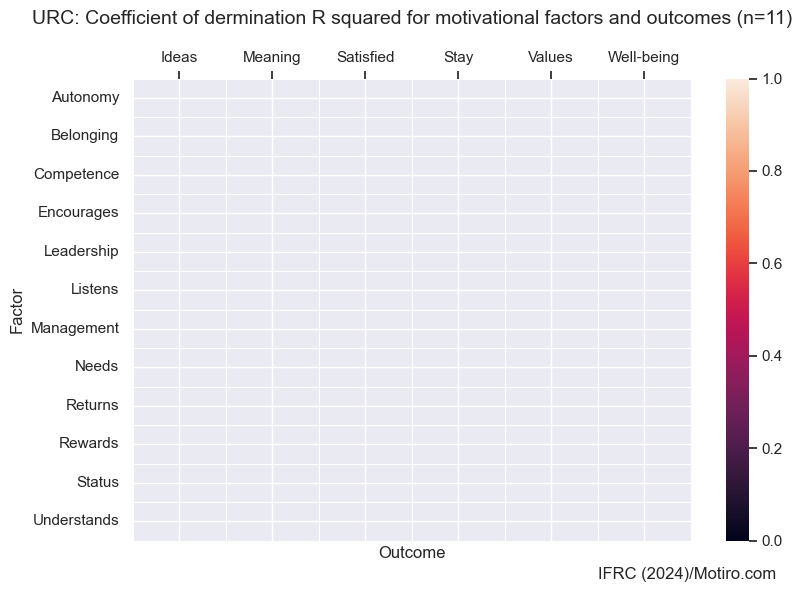

In [ ]:
#  COUNTRY PROFILE: UKRAINE
#  CORRELATION DETERMINANTS R for staying, being satisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using Linear regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

df = pd.read_csv('URC_ALL.txt')

columnY = ['Well-being', 'Satisfied', 'Meaning', 'Values', 'Ideas', 'Stay'] 
columnX = ['Needs', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Understands', 'Encourages', 'Listens',
           'Management', 'Returns', 'Rewards', 'Status']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'CorrDet'])

for Y in columnY:
    for X in columnX:
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        model = LinearRegression().fit(X_data, Y_data)
        r_sq = model.score(X_data, Y_data)
        r = np.sqrt(r_sq)
        print(Y, X, r_sq, r)
        
        # Append results to the results_df DataFrame
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'CorrCoef': [r]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Save the results DataFrame to a CSV file
results_df.to_csv('CorrDet_Ukraine.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='CorrDet')

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel('CorrDet_PivotTable_Ukraine.xlsx', index=False)      

# heatmap to represent odds ratios for UKRAINE RED CROSS only (staff+volunteers)
sns.set_theme()

df = pd.read_csv('CorrDet_Ukraine.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='CorrDet')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", vmin=0, vmax=1, linewidths=.5, ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5, 13, "IFRC (2024)/Motiro.com", fontdict={'size': 12})
plt.title(f'URC: Coefficient of dermination R squared for motivational factors and outcomes (n={n})',
          x=0.5, y=1.1, fontsize=14)

# Save the plot as an image file
plt.savefig('URC_R-sq_heatmap.png', bbox_inches='tight', pad_inches=0)

In [64]:
# create dummy variables for motivational outcomes (Y) and independent variables (x)
df = pd.read_csv("URC_ALL.txt")

# first we select 2 types of outcome variable - on 1-5 and 1-7 scales
# we create dictionary to recode the values in each category of outcome variables

columns5 = ['Satisfied',
            'Stay',
            'Values',
            'Meaning',
            'Ideas',
            ]

columns7 = ['Strong',
           'Drained',
           'Frustrated']

# we create dictionary to recode the values in each category of outcome variables
# neutral (3) is considered positive, i.e. Y=1 if neutral)
mapping5 = {
    5: 1,
    4: 1,
    3: 1,
    2: 0,
    1: 0
}

# NB: this is the current coding for frequencies:
#    "Every day": 7,
#    "Very often": 6,
#    "Often": 5,
#    "Sometimes": 4,
#    "Rarely": 3,
#    "Almost never": 2,
#    "Never": 1
# We set the cut off point between 4 (sometimes) and 5 (often), i.e. Y=1 if "often"
mapping7 = {
    7: 1,
    6: 1,
    5: 1,
    4: 0,
    3: 0,
    2: 0,
    1: 0
}

df[columns5] = df[columns5].replace(mapping5)
df[columns7] = df[columns7].replace(mapping7)

df.head(20)

#Independent Variables to convert into dummy variables for Odds Ratio computations
# we create dictionary to recode the values in each category of outcome variables
# cutoff point: 3.5 and above considered positive.
# We keep the original continous variables in the data.

df['Well'] = df['Well-being']
df['3Needsmet'] = df['Needs']
df['Autonomous'] = df['Autonomy']
df['Belongs'] = df['Belonging']
df['Competent'] = df['Competence']
df['LeaderOK'] = df['Leadership']
df['Understood'] = df['Understands']
df['Encouraged'] = df['Encourages']
df['Heard'] = df['Listens']
df['ManagementOK'] = df['Management']
df['ReturnsOK'] = df['Returns']
df['RewardsOK'] = df['Rewards']
df['StatusOK'] = df['Status']
   
DummyColumns = [
    'Well',
    '3Needsmet',
    'Autonomous',
    'Belongs',
    'Competent',
    'LeaderOK',
    'Understood',
    'Encouraged',
    'Heard',
    'ManagementOK',
    'ReturnsOK',
    'RewardsOK',
    'StatusOK'
    ] 

# Calculate the rounded value row by row and assign it to a new dummy variable column
# By rounding we can have 3.5 and above as 1  and below 3.5 as 0
df[DummyColumns] = df[DummyColumns].round(0)
df[DummyColumns] = df[DummyColumns].astype(int)
df
mappingX = {
    5: 1,
    4: 1,
    3: 0,
    2: 0,
    1: 0
}

df[DummyColumns] = df[DummyColumns].replace(mappingX)

#for Var_x in df[DummyColumn]:
#    Var_x = float(Var_x)
#    if Var_x < 4 :
#        Var_x = 0
#    else: Var_x = 1
    
#Variables to keep for logistic regressions
columns = ['Strong', 'Drained', 'Frustrated',
           'Satisfied', 'Stay', 'Values', 'Meaning', 'Ideas',
           'region', 'Staff', 'Volunteer',
           'Well-being', 'Needs', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Understands', 'Encourages', 'Listens',
           'Management', 'Returns', 'Rewards', 'Status',
           'Well', '3Needsmet', 'Autonomous', 'Belongs', 'Competent',
           'LeaderOK', 'Understood', 'Encouraged', 'Heard',
           'ManagementOK', 'ReturnsOK', 'RewardsOK', 'StatusOK', 'Front'
          ]

LogReg_df=df[columns]


LogReg_df.to_csv('LogReg_df_URC.csv', index=False)
df.head(7)


df.shape

(2561, 59)

Stay 3Needsmet [[24.07812039]]
Stay Autonomous [[15.29710313]]
Stay Belongs [[8.00600029]]
Stay Competent [[11.82471615]]
Stay LeaderOK [[10.71505316]]
Stay Understood [[8.96783265]]
Stay Encouraged [[5.53520212]]
Stay Heard [[8.96079976]]
Stay ManagementOK [[25.62281008]]
Stay ReturnsOK [[16.19806568]]
Stay RewardsOK [[13.52259483]]
Stay StatusOK [[26.23608262]]
Stay Volunteer [[0.78939882]]
Stay Front [[2.23211018]]
Satisfied 3Needsmet [[52.80483579]]
Satisfied Autonomous [[73.53421031]]
Satisfied Belongs [[16.73236126]]
Satisfied Competent [[11.1852088]]
Satisfied LeaderOK [[26.0041808]]
Satisfied Understood [[19.4336875]]
Satisfied Encouraged [[15.13455724]]
Satisfied Heard [[10.48144798]]
Satisfied ManagementOK [[33.09632718]]
Satisfied ReturnsOK [[26.63287794]]
Satisfied RewardsOK [[24.46691613]]
Satisfied StatusOK [[27.79840389]]
Satisfied Volunteer [[1.01442554]]
Satisfied Front [[0.38013685]]
Meaning 3Needsmet [[33.83584441]]
Meaning Autonomous [[20.31874472]]
Meaning Belongs 

C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_19808\1785469484.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Values Encouraged [[7.90590178]]
Values Heard [[12.90127]]
Values ManagementOK [[21.51153695]]
Values ReturnsOK [[17.1002959]]
Values RewardsOK [[7.29099122]]
Values StatusOK [[15.90317536]]
Values Volunteer [[1.23272138]]
Values Front [[0.86475767]]
Ideas 3Needsmet [[16.98052753]]
Ideas Autonomous [[8.71099193]]
Ideas Belongs [[12.15097223]]
Ideas Competent [[9.52629809]]
Ideas LeaderOK [[8.23319236]]
Ideas Understood [[8.62532834]]
Ideas Encouraged [[5.58127564]]
Ideas Heard [[8.6121791]]
Ideas ManagementOK [[9.09274056]]
Ideas ReturnsOK [[15.65924836]]
Ideas RewardsOK [[6.31241852]]
Ideas StatusOK [[9.56554381]]
Ideas Volunteer [[0.44322651]]
Ideas Front [[2.43185074]]
Well 3Needsmet [[14.39791913]]
Well Autonomous [[9.52190059]]
Well Belongs [[5.00904484]]
Well Competent [[4.29471741]]
Well LeaderOK [[4.91932603]]
Well Understood [[5.91095367]]
Well Encouraged [[3.20445871]]
Well Heard [[4.13935547]]
Well ManagementOK [[7.7182433]]
Well ReturnsOK [[5.49846712]]
Well RewardsOK [[3.9

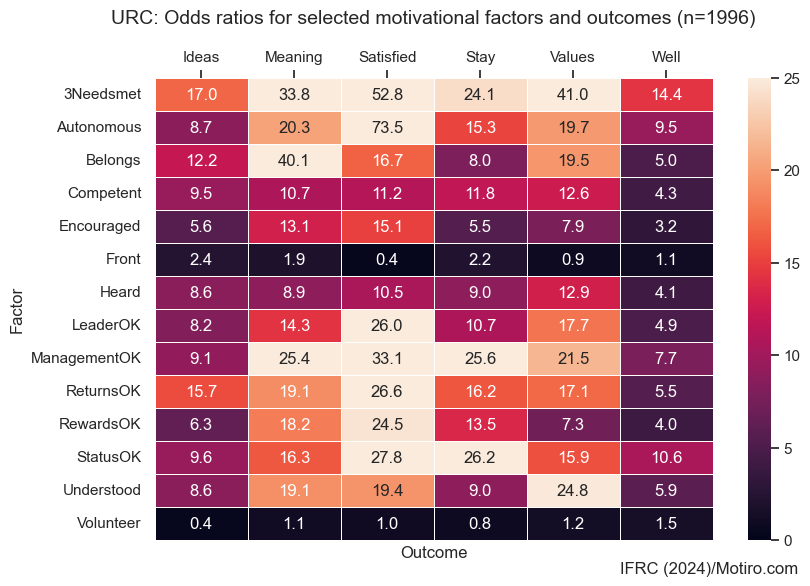

In [71]:
###### COUNTRY PROFILE: UKRAINE
#  Odds ratios for staying, being satisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using logistic regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('LogReg_df_URC.csv')

# Filter the dataframe for 'country' = 'Ukraine'
#df = df[df['Country'] == 'Ukraine']

columnY = ['Stay', 'Satisfied', 'Meaning', 'Values', 'Ideas', 'Well'] 
columnX = ['3Needsmet', 'Autonomous', 'Belongs', 'Competent',
           'LeaderOK', 'Understood', 'Encouraged', 'Heard',
           'ManagementOK', 'ReturnsOK', 'RewardsOK', 'StatusOK', 'Volunteer', 'Front']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'Odds ratio'])

for Y in columnY:
    for X in columnX:
        clf = LogisticRegression(penalty=None)
        # Reshape the data to be 2D
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        clf.fit(X_data, Y_data)
        odds_ratio = np.exp(clf.coef_)
        print(Y, X, odds_ratio)
        # Append results to the results_df DataFrame using pd.concat
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'Odds ratio': [odds_ratio[0][0]]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display the results DataFrame
#print(results_df)

# Save the results DataFrame to a CSV file
results_df.to_csv('odds_ratios_Ukraine.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Display the pivot_table
#print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel('odds_ratios_PivotTable_Ukraine.xlsx', index=False)      

# heatmap to represent odds ratios for UKRAINE RED CROSS only (all are volunteers)
sns.set_theme()

df = pd.read_csv('odds_ratios_Ukraine.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", vmin=0, vmax=25, linewidths=.5, ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5, 15, "IFRC (2024)/Motiro.com", fontdict={'size': 12})
plt.title(f'URC: Odds ratios for selected motivational factors and outcomes (n={n})',
          x=0.5, y=1.1, fontsize=14)

# Save the plot as an image file
plt.savefig('URC_OR_heatmap.png', bbox_inches='tight', pad_inches=0)

Stay 3Needsmet [[24.07812039]]
Stay Autonomous [[15.29710313]]
Stay Belongs [[8.00600029]]
Stay Competent [[11.82471615]]
Stay LeaderOK [[10.71505316]]
Stay Understood [[8.96783265]]
Stay Encouraged [[5.53520212]]
Stay Heard [[8.96079976]]
Stay ManagementOK [[25.62281008]]
Stay ReturnsOK [[16.19806568]]
Stay RewardsOK [[13.52259483]]
Stay StatusOK [[26.23608262]]
Stay Front [[2.23211018]]
Drained 3Needsmet [[0.13106208]]
Drained Autonomous [[0.17499374]]
Drained Belongs [[0.29528799]]
Drained Competent [[0.4803131]]
Drained LeaderOK [[0.25935425]]
Drained Understood [[0.2450451]]
Drained Encouraged [[0.39175555]]
Drained Heard [[0.37165152]]
Drained ManagementOK [[0.25141005]]
Drained ReturnsOK [[0.37162798]]
Drained RewardsOK [[0.34762504]]
Drained StatusOK [[0.17445592]]
Drained Front [[0.84418319]]
Frustrated 3Needsmet [[0.05274393]]
Frustrated Autonomous [[0.08820116]]
Frustrated Belongs [[0.12998625]]
Frustrated Competent [[0.18727539]]
Frustrated LeaderOK [[0.13618286]]
Frustrate

C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_32416\196161748.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Frustrated ManagementOK [[0.08193055]]
Frustrated ReturnsOK [[0.10910654]]
Frustrated RewardsOK [[0.13954949]]
Frustrated StatusOK [[0.07190088]]
Frustrated Front [[0.87743695]]
Satisfied 3Needsmet [[52.80483579]]
Satisfied Autonomous [[73.53421031]]
Satisfied Belongs [[16.73236126]]
Satisfied Competent [[11.1852088]]
Satisfied LeaderOK [[26.0041808]]
Satisfied Understood [[19.4336875]]
Satisfied Encouraged [[15.13455724]]
Satisfied Heard [[10.48144798]]
Satisfied ManagementOK [[33.09632718]]
Satisfied ReturnsOK [[26.63287794]]
Satisfied RewardsOK [[24.46691613]]
Satisfied StatusOK [[27.79840389]]
Satisfied Front [[0.38013685]]
Meaning 3Needsmet [[33.83584441]]
Meaning Autonomous [[20.31874472]]
Meaning Belongs [[40.05529262]]
Meaning Competent [[10.70962946]]
Meaning LeaderOK [[14.27635684]]
Meaning Understood [[19.14996222]]
Meaning Encouraged [[13.05098379]]
Meaning Heard [[8.94615238]]
Meaning ManagementOK [[25.37382655]]
Meaning ReturnsOK [[19.1184271]]
Meaning RewardsOK [[18.1869

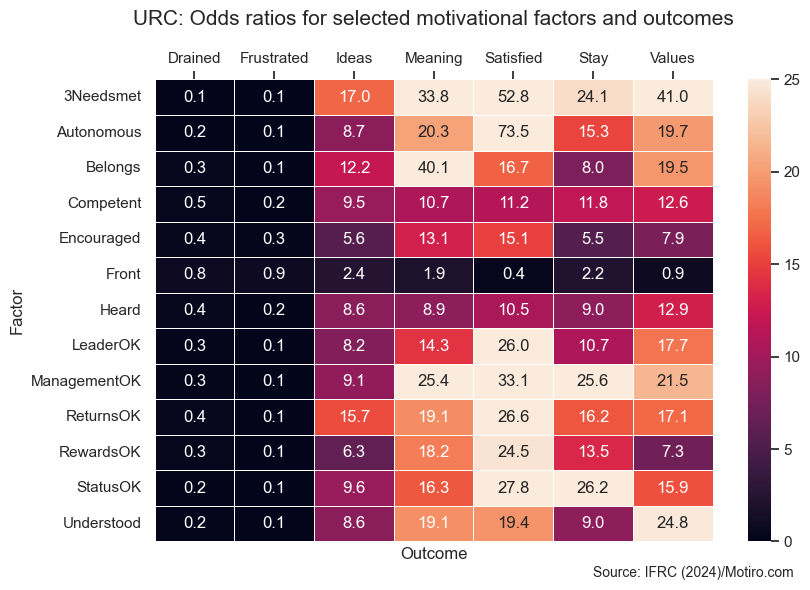

In [48]:
#  COUNTRY PROFILE: UKRAINE
#  Odds ratios for staying, being staisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using logistic regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('LogReg_df_URC.csv')

# Filter the dataframe for 'country' = 'Ukraine'
#df = df[df['Country'] == 'Ukraine']

columnY = ['Stay', 'Drained', 'Frustrated', 'Satisfied', 'Meaning', 'Values', 'Ideas'] 
columnX = ['3Needsmet', 'Autonomous', 'Belongs', 'Competent',
           'LeaderOK', 'Understood', 'Encouraged', 'Heard',
           'ManagementOK', 'ReturnsOK', 'RewardsOK', 'StatusOK', 'Front']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'Odds ratio'])

for Y in columnY:
    for X in columnX:
        clf = LogisticRegression(penalty=None)
        # Reshape the data to be 2D
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        clf.fit(X_data, Y_data)
        odds_ratio = np.exp(clf.coef_)
        print(Y, X, odds_ratio)
        # Append results to the results_df DataFrame using pd.concat
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'Odds ratio': [odds_ratio[0][0]]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display the results DataFrame
#print(results_df)

# Save the results DataFrame to a CSV file
results_df.to_csv('odds_ratios_Ukraine.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Display the pivot_table
#print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel('odds_ratios_PivotTable_Ukraine.xlsx', index=False)      

# heatmap to represent odds ratios for LEBANESE RED CROSS only (all are volunteers)
sns.set_theme()

df = pd.read_csv('odds_ratios_Ukraine.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", vmin=0, vmax=25, linewidths=.5, ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5.5, 14, "Source: IFRC (2024)/Motiro.com", fontdict={'size': 10})
plt.title('URC: Odds ratios for selected motivational factors and outcomes', x=0.5, y=1.1, fontsize=15)

# Save the plot as an image file
plt.savefig('Ukraine_OR_heatmap2.png')

Status {'size': 75, 'color': 'bisque'}
Rewards {'size': 75, 'color': 'bisque'}
Returns {'size': 75, 'color': 'bisque'}
Listens {'size': 75, 'color': 'lightblue'}
Understands {'size': 75, 'color': 'lightblue'}
Encourages {'size': 75, 'color': 'lightblue'}
Autonomy {'size': 75, 'color': 'thistle'}
Belonging {'size': 75, 'color': 'thistle'}
Competence {'size': 75, 'color': 'thistle'}
Frustrated {'size': 75, 'color': 'pink'}
Drained {'size': 75, 'color': 'pink'}
Strong {'size': 75, 'color': 'pink'}
Meaning {'size': 75, 'color': 'palegreen'}
Ideas {'size': 75, 'color': 'palegreen'}
Values {'size': 75, 'color': 'palegreen'}
Stay {'size': 75, 'color': 'palegreen'}
Satisfied {'size': 75, 'color': 'palegreen'}


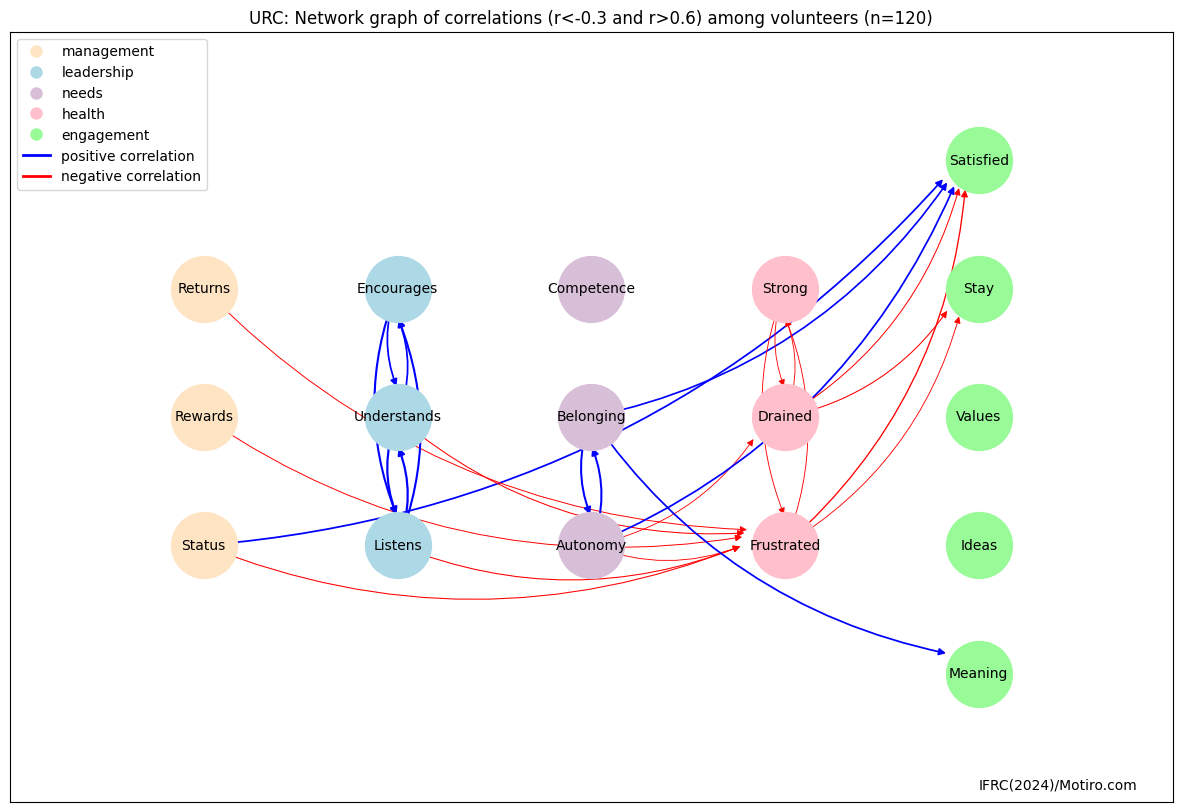

In [38]:
## VOLUNTEERS Ukraine Red Cross Correlations network graph key variables on horizontal axis
import networkx as nx
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import math

#set correlation coefficient thresholds for graph
negcorr = -0.3
poscorr = 0.6

df = pd.read_csv("URC_ALL.txt")

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Volunteer']
df = df[df['frontline'] == 'Frontline']
df = df[df['region'] == 'Donetsk Region']
# Count the total number of respondents (n)
n = df['Volunteer'].sum()

# Compute correlation matrix with numeric_only set to True to avoid warning
corr_matrix = df.corr(numeric_only=True)


# Define variable sets
management_vars = ['Status', 'Rewards', 'Returns']
leadership_vars = ['Listens', 'Understands', 'Encourages']
needs_vars = ['Autonomy', 'Belonging', 'Competence']
health_vars = ['Frustrated', 'Drained', 'Strong']
engagement_vars = ['Meaning', 'Ideas', 'Values', 'Stay', 'Satisfied']

all_vars = management_vars + leadership_vars + needs_vars + health_vars + engagement_vars

# Create the graph
G = nx.DiGraph()

# Define variable colors
colors = {
    'management_vars': 'bisque',
    'leadership_vars': 'lightblue',
    'needs_vars': 'thistle',
    'health_vars': 'pink',
    'engagement_vars': 'palegreen'
}

# Modify the node addition part to include the color attribute
for var in all_vars:
    node_size = sum(corr_matrix[var])  # Sum of correlation coefficients
    if var in management_vars:
        node_color = colors['management_vars']
    elif var in leadership_vars:
        node_color = colors['leadership_vars']
    elif var in needs_vars:
        node_color = colors['needs_vars']
    elif var in health_vars:
        node_color = colors['health_vars']
    else:
        node_color = colors['engagement_vars']
    G.add_node(var, size=node_size, color=node_color)
    

# adjust arrows so that they touch circle periphery and are not hidden by the nodes' colored circle

def adjust_line_to_circle(x1, y1, x2, y2, r):
    """
    Adjusts the line segment (x1, y1) to (x2, y2) to stop at the circumference of a circle of radius r centered at (x2, y2).
    """
    angle = math.atan2(y2 - y1, x2 - x1)
    x2_new = x2 - r * math.cos(angle)
    y2_new = y2 - r * math.sin(angle)
    return x1, y1, x2_new, y2_new

# Add edges with color and weight attributes
for var1 in all_vars:
    for var2 in all_vars:
        correlation = corr_matrix[var1][var2]
        if var1 != var2 and not np.isnan(correlation) and (correlation > poscorr or correlation < negcorr):
            weight = abs(correlation)
            color = 'blue' if correlation > 0 else 'red'
            
            # Define the direction based on variable sets
            if var1 in management_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in needs_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in management_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in health_vars and var2 in engagement_vars:
                G.add_edge(var1, var2, weight=weight, color=color)
            elif set([var1, var2]).issubset(set(management_vars)) or \
                 set([var1, var2]).issubset(set(leadership_vars)) or \
                 set([var1, var2]).issubset(set(needs_vars)) or \
                 set([var1, var2]).issubset(set(health_vars)) or \
                 set([var1, var2]).issubset(set(engagement_vars)):
                # Only add bidirectional arrows if they're in the same set
                G.add_edge(var1, var2, weight=weight, color=color)
                G.add_edge(var2, var1, weight=weight, color=color)

# Create positions for nodes
positions = {}
spacing_h = 1
spacing_v = 1

# Compute maximum group length for vertical centering
max_len = max(map(len, [management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))

for i, group in enumerate([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]):
    # Compute the starting y-coordinate for this group
    start_y = (max_len - len(group)) * spacing_v / 2
    
    for j, var in enumerate(group):
        positions[var] = (i * spacing_h, start_y + j * spacing_v)

for node, attributes in G.nodes(data=True):
    if np.isnan(attributes['size']):
        G.nodes[node]['size'] = 75  # Set default size

for node, data in G.nodes(data=True):
    print(node, data)

# Dummy lines for the legend
from matplotlib.lines import Line2D
legend_elements = []

# Adding legend for nodes
for label, color in colors.items():
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=label.replace('_vars', ''), markersize=10, markerfacecolor=color))

# Adding legend for edges
legend_elements.append(Line2D([0], [0], color='blue', lw=2, label='positive correlation'))
legend_elements.append(Line2D([0], [0], color='red', lw=2, label='negative correlation'))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Modify the Draw nodes part to use the color from the node attributes
for node, (x, y) in positions.items():
    node_color = G.nodes[node]['color']
    ax.scatter(x, y, s=G.nodes[node]['size'] * 30, c=node_color, zorder=2)
    ax.text(x, y, node, ha='center', va='center', fontsize=10, zorder=3)

# Draw edges with a slight curve using connectionstyle
for u, v, data in G.edges(data=True):
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    
    # Adjust end of arrow to connect to the node circle's periphery
    node_radius = math.sqrt(G.nodes[v]['size'] * 0.002 / math.pi)
    x1, y1, x2, y2 = adjust_line_to_circle(x1, y1, x2, y2, node_radius)

    arrowprops = dict(arrowstyle='-|>', linewidth=data['weight'] * 2, color=data['color'], 
                      connectionstyle="arc3,rad=0.2")  # Adding a curve
    plt.annotate("", xy=(x2, y2), xytext=(x1, y1), arrowprops=arrowprops, zorder=1)

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper left')

plt.title(f'URC: Network graph of correlations (r<{negcorr} and r>{poscorr}) among volunteers (n={n})')
plt.text(4, -0.9, "IFRC(2024)/Motiro.com", size=10)
plt.xlim(-1, len([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))
plt.ylim(-1, max_len)  # Using max_len for the ylim

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('URC VOL SDTCorrNetworkGraph.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


Status {'size': 75, 'color': 'bisque'}
Rewards {'size': 75, 'color': 'bisque'}
Returns {'size': 75, 'color': 'bisque'}
Listens {'size': 75, 'color': 'lightblue'}
Understands {'size': 75, 'color': 'lightblue'}
Encourages {'size': 75, 'color': 'lightblue'}
Autonomy {'size': 75, 'color': 'thistle'}
Belonging {'size': 75, 'color': 'thistle'}
Competence {'size': 75, 'color': 'thistle'}
Frustrated {'size': 75, 'color': 'pink'}
Drained {'size': 75, 'color': 'pink'}
Strong {'size': 75, 'color': 'pink'}
Meaning {'size': 75, 'color': 'palegreen'}
Ideas {'size': 75, 'color': 'palegreen'}
Values {'size': 75, 'color': 'palegreen'}
Stay {'size': 75, 'color': 'palegreen'}
Satisfied {'size': 75, 'color': 'palegreen'}


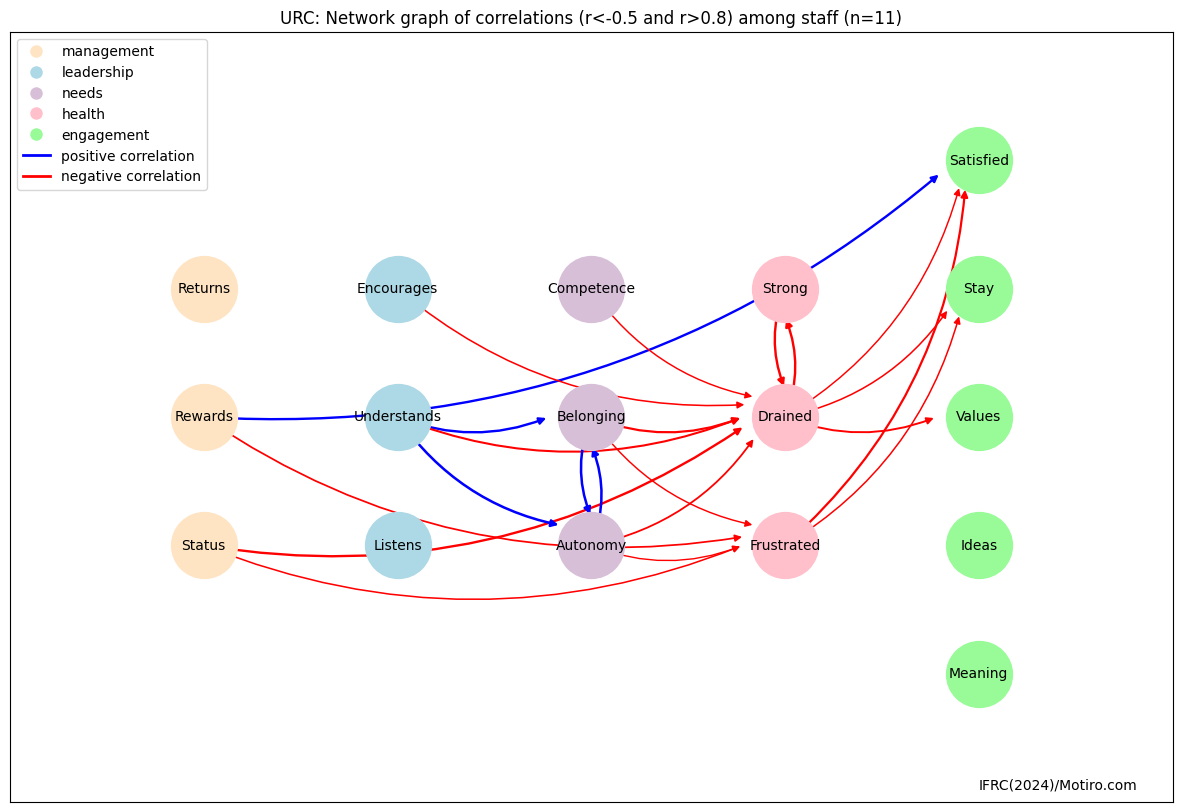

In [40]:
## STAFF Ukraine Red Cross Correlations network graph key variables on horizontal axis
import networkx as nx
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import math

#set correlation coefficient thresholds for graph
negcorr = -0.5
poscorr = 0.8

df = pd.read_csv("URC_ALL.txt")

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Staff']
df = df[df['frontline'] == 'Frontline']
df = df[df['region'] == 'Donetsk Region']
# Count the total number of respondents (n)
n = df['Staff'].sum()

# Compute correlation matrix with numeric_only set to True to avoid warning
corr_matrix = df.corr(numeric_only=True)


# Define variable sets
management_vars = ['Status', 'Rewards', 'Returns']
leadership_vars = ['Listens', 'Understands', 'Encourages']
needs_vars = ['Autonomy', 'Belonging', 'Competence']
health_vars = ['Frustrated', 'Drained', 'Strong']
engagement_vars = ['Meaning', 'Ideas', 'Values', 'Stay', 'Satisfied']

all_vars = management_vars + leadership_vars + needs_vars + health_vars + engagement_vars

# Create the graph
G = nx.DiGraph()

# Define variable colors
colors = {
    'management_vars': 'bisque',
    'leadership_vars': 'lightblue',
    'needs_vars': 'thistle',
    'health_vars': 'pink',
    'engagement_vars': 'palegreen'
}

# Modify the node addition part to include the color attribute
for var in all_vars:
    node_size = sum(corr_matrix[var])  # Sum of correlation coefficients
    if var in management_vars:
        node_color = colors['management_vars']
    elif var in leadership_vars:
        node_color = colors['leadership_vars']
    elif var in needs_vars:
        node_color = colors['needs_vars']
    elif var in health_vars:
        node_color = colors['health_vars']
    else:
        node_color = colors['engagement_vars']
    G.add_node(var, size=node_size, color=node_color)
    

# adjust arrows so that they touch circle periphery and are not hidden by the nodes' colored circle

def adjust_line_to_circle(x1, y1, x2, y2, r):
    """
    Adjusts the line segment (x1, y1) to (x2, y2) to stop at the circumference of a circle of radius r centered at (x2, y2).
    """
    angle = math.atan2(y2 - y1, x2 - x1)
    x2_new = x2 - r * math.cos(angle)
    y2_new = y2 - r * math.sin(angle)
    return x1, y1, x2_new, y2_new

# Add edges with color and weight attributes
for var1 in all_vars:
    for var2 in all_vars:
        correlation = corr_matrix[var1][var2]
        if var1 != var2 and not np.isnan(correlation) and (correlation > poscorr or correlation < negcorr):
            weight = abs(correlation)
            color = 'blue' if correlation > 0 else 'red'
            
            # Define the direction based on variable sets
            if var1 in management_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in needs_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in management_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in health_vars and var2 in engagement_vars:
                G.add_edge(var1, var2, weight=weight, color=color)
            elif set([var1, var2]).issubset(set(management_vars)) or \
                 set([var1, var2]).issubset(set(leadership_vars)) or \
                 set([var1, var2]).issubset(set(needs_vars)) or \
                 set([var1, var2]).issubset(set(health_vars)) or \
                 set([var1, var2]).issubset(set(engagement_vars)):
                # Only add bidirectional arrows if they're in the same set
                G.add_edge(var1, var2, weight=weight, color=color)
                G.add_edge(var2, var1, weight=weight, color=color)

# Create positions for nodes
positions = {}
spacing_h = 1
spacing_v = 1

# Compute maximum group length for vertical centering
max_len = max(map(len, [management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))

for i, group in enumerate([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]):
    # Compute the starting y-coordinate for this group
    start_y = (max_len - len(group)) * spacing_v / 2
    
    for j, var in enumerate(group):
        positions[var] = (i * spacing_h, start_y + j * spacing_v)

for node, attributes in G.nodes(data=True):
    if np.isnan(attributes['size']):
        G.nodes[node]['size'] = 75  # Set default size

for node, data in G.nodes(data=True):
    print(node, data)

# Dummy lines for the legend
from matplotlib.lines import Line2D
legend_elements = []

# Adding legend for nodes
for label, color in colors.items():
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=label.replace('_vars', ''), markersize=10, markerfacecolor=color))

# Adding legend for edges
legend_elements.append(Line2D([0], [0], color='blue', lw=2, label='positive correlation'))
legend_elements.append(Line2D([0], [0], color='red', lw=2, label='negative correlation'))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Modify the Draw nodes part to use the color from the node attributes
for node, (x, y) in positions.items():
    node_color = G.nodes[node]['color']
    ax.scatter(x, y, s=G.nodes[node]['size'] * 30, c=node_color, zorder=2)
    ax.text(x, y, node, ha='center', va='center', fontsize=10, zorder=3)

# Draw edges with a slight curve using connectionstyle
for u, v, data in G.edges(data=True):
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    
    # Adjust end of arrow to connect to the node circle's periphery
    node_radius = math.sqrt(G.nodes[v]['size'] * 0.002 / math.pi)
    x1, y1, x2, y2 = adjust_line_to_circle(x1, y1, x2, y2, node_radius)

    arrowprops = dict(arrowstyle='-|>', linewidth=data['weight'] * 2, color=data['color'], 
                      connectionstyle="arc3,rad=0.2")  # Adding a curve
    plt.annotate("", xy=(x2, y2), xytext=(x1, y1), arrowprops=arrowprops, zorder=1)

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper left')

plt.title(f'URC: Network graph of correlations (r<{negcorr} and r>{poscorr}) among staff (n={n})')
plt.text(4, -0.9, "IFRC(2024)/Motiro.com", size=10)
plt.xlim(-1, len([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))
plt.ylim(-1, max_len)  # Using max_len for the ylim

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('URC STAFF SDTCorrNetworkGraph.png', bbox_inches='tight', pad_inches=0.1)
plt.show()
